#Trabajo Final
#**Introducción al Aprendizaje Automático** 
##*Análisis de imperfecciones (beads) en las fibras de mallados hechos por electrospinning de PVDF*

##Introducción al tema

El electrospinning es una técnica que permite generar mallados de nano y microfibras a partir de soluciones poliméricas. Se introduce una solución polímerica (polímero-solvente o combinación de ellos) en una jeringa y se lo hace llegar mediante una bomba infusora a una aguja o punta metálica la cual se carga con una fuente de alta tensión. A cierta distancia se coloca un electrodo a tierra (Figura 1). Debido a la alta tensión, la solución se carga y se eyectan jets desde la punta hacia el colector. En el camino el jet sufre inestabilidades, se estira y se van evaporando los solventes. Las fibras se entrecruzan en el colector formando capas que forman una especie de mallado o tela no-tejida. Estos mallados tienen muchas diversas aplicaciones según la composición de materiales utilizados y morfología de las fibras. 

La dificultad de la técnica reside en que requiere una combinación, en algunos casos bastante precisa, de varios parámetros para funcionar. Vamos a considerar el caso de trabajo, que es el de un solo polímero y dos solventes: polivinilideno fluorado (PVDF), y dimetilacetamica (DMAC) y acetona, respectivamente. Los parámetros a considerar entonces, son:

**Parámetros de la solución:**
- Concentración del polímero.
- Ratio entre las concentraciones de los solventes.

Una vez elegidos los materiales, estos parámetros son los que determinan las propiedades físicas fundamentales para el proceso: conductividad, viscosidad, tensión superficial, constante dieléctrica, etc.

**Parámetros de la técnica:**
- Voltaje entre aguja y colector
- Distancia entre aguja y colector
- Caudal de infusión
- Geometría del colector

Hay algunos más que tienen que ver con la geometría de la cámara, la cantidad de agujas y el diámetro interno de las mismas, pero en este trabajo se mantuvieron constantes así que no los tendremos en cuenta.

**Parámetros ambientales:**
- Temperatura
- Humedad relativa

##Problema a solucionar

La combinación de parámetros no sólo determina si es posible obtener fibras o no, sino también determina su forma, diámetro medio, dispersión de tamaño y la aparición o no de imperfecciones, así como sus respectivas morfologías. Las imperfecciones más comunes son lo que se denominan *beads*, que son pequeñas gotas de distintas formas y tamaños entrelazadas en las fibras. Según la aplicación del mallado, las *beads* pueden ser aceptables o no, y en algunos casos particulares, hasta deseables. Sin embargo, en general las *beads* resultan indeseables ya que generan inhomogeneidades en los mallados, y se pierde una de las propiedades más importantes de las telas hechas por electrospinning: el muy alto cociente entre área y volumen, favorecido por fibras extremadamente finas.

Hallar la combinación de parámetros que permiten la generación de mallados de fibras finas y/u homogéneas y sin defectos o *beads*, puede ser una tarea muy sencilla o muy compleja, según los materiales utilizados. Dado que el proceso es también muy dependiente de otros tantos factores experimentales menos reproducibles (como la geometría del equipo y la cámara utilizada, las dimensiones de los elementos utilizados, etc.), muchas veces, los parámetros típicos utilizados en la bibliografía no resultan satisfactorios en otros laboratorios. 

Para este trabajo se obtuvieron datos de área y ancho de *bead* ([Feret's min diameter](https://en.wikipedia.org/wiki/Feret_diameter)) mediante análisis de imágenes en el ImageJ. Las fotos fueron obtenidas con microscopio óptico (x100 de aumento). Un ejemplo de imagen analizada se observa en la Figura 2. De cada muestra se midieron varias imágenes para obtener estadística$^{1}$. En particular, en este caso es de interés que, en el caso de haber *beads*, las mismas tengan un ancho inferior a $10$ $\mu m$, y por esta razón, no se midieron *beads* de menor tamaño (y se eliminaron del análisis aquellas que habían sido medidas).

En este trabajo, se busca hallar los parámetros del proceso que permiten la obtención de fibras con la menor cantidad de defectos, así como un tamaño reducido de cada uno de ellos. La idea es poder mapear un espacio muy amplio de parámetros con la menor cantidad de datos posible (ya que la obtención de los datos requiere experimentos que llevan tiempo y cuestan materiales), y mediante la aplicación de modelos de aprendizaje automático, poder predecir con la mayor precisión posible, en qué zonas del espacio de parámetros, se espera poder obtener fibras con la menor cantidad de defectos y con los defectos de menor tamaño. También es de interés determinar cuáles son los parámetros de mayor y menor relevancia, así cómo hallar posibles correlaciones entre combinaciones de parámetros (que potencialmente puedan ser explicadas físicamente).  

$^{1}$Tenía al principio de la materia la intención de aprovechar lo aprendido para desarrollar un algoritmo con redes neuronales convolucionales para analizar de forma automatizada futuras imágenes, y detectar las beads en imágenes de microscopio. Pero por lo visto, resulta algo mucho más complejo de lo esperado. Tendría que entrenar el algoritmo con muchísimas imágenes, que si bien ya tengo muchas analizadas, no sé ni cómo traduciría el análisis hecho (el marcado manual de las beads en las imagenes). El algoritmo tendría que ser capaz de detectar los bordes de las beads, aún cuando se encuentran en medio de fibras y por lo tanto no son partículas aisladas. Tendría que ser capaz de ir barriendo el espacio y encontrarlas aunque tuvieran formas y tamaños muy distintos. No descarto que es algo factible, pero me pareció que requiere mucho más trabajo de estudio por fuera de los contenidos de la materia. 

##Análisis de la data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)
import pandas as pd
from pandas.plotting import scatter_matrix

Importo la data y les dejo algunas líneas para que vean de qué se trata.

In [ ]:
directorio = '/content/elegidos1.csv'

beads = pd.read_csv(directorio, sep=';',encoding='latin1')


In [ ]:
beads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   n                         81 non-null     int64  
 1   ref                       81 non-null     object 
 2   concentracion_PVDF        81 non-null     float64
 3   ratio_solventes           81 non-null     float64
 4   voltaje                   81 non-null     int64  
 5   distancia_aguja_colector  81 non-null     float64
 6   caudal                    81 non-null     float64
 7   colector                  81 non-null     object 
 8   temperatura               81 non-null     float64
 9   humedad                   81 non-null     int64  
 10  diametro_90               81 non-null     float64
 11  mediana                   81 non-null     float64
 12  diametro_medio            81 non-null     float64
 13  desviacion_estandar       81 non-null     float64
 14  fraccion_bea

In [ ]:
beads.head()

,n,ref,concentracion_PVDF,ratio_solventes,voltaje,distancia_aguja_colector,caudal,colector,temperatura,humedad,diametro_90,mediana,diametro_medio,desviacion_estandar,fraccion_beads_fibras,C1,densidad_de_beads
0,6,a,18.8,1.18,9,23.0,0.2,Rotante 4,28.6,46,25.7,16.9,17.4,5.6,0.703,19.3,80
1,6,b,18.8,1.18,12,23.0,0.2,Rotante 4,28.6,49,28.6,20.5,21.5,6.2,1.491,27.8,115
2,6,d,18.8,1.18,9,27.0,0.2,Rotante 4,28.9,45,31.0,20.8,22.6,9.9,1.166,15.6,64
3,21,e,20.4,1.32,16,20.0,0.2,plano,27.6,48,28.5,20.0,21.0,6.3,1.757,34.1,141
4,22,b,15.8,1.29,8,10.0,0.2,plano,27.0,52,28.8,19.1,20.2,6.6,1.350,24.9,103


Separo los features de los targets. Hago algunas aclaraciones previas:

**De los features:** 
- Los factores ambientales no fueron controlados, pero sí medidos. Se tomó la consideración de intentar restringir los valores a un rango que no afectara drásticamente los resultados, pero no puedo asegurar a priori que se haya logrado.
- El caudal es prácticamente una variable categórica en este trabajo dado que se observó en estudios previos que era muy determinante y se fijó un valor de caudal para el resto. En muestras con caudal más alto, el tamaño y cantidad de defectos se disparaba enormemente, por lo que ni siquiera se realizó el trabajo de analizar esas imágenes. 
- El colector es una categórica que dice si se trata de un colector plano o uno rotante. En general fue plano. Tanto al caudal como al colector, los voy a analizar independientemente del resto para empezar.

**De los targets:** los de mayor interés son el diámetro medio de las beads ($\mu m$) y la densidad de beads sobre fibras (%). Los demás fueron obtenidos sin costo extra mediante el código de python previo, que tradujo, de los datos obtenidos en las imágenes, los valores medios relevantes para cada muestra.

In [ ]:
features = beads[["concentracion_PVDF","ratio_solventes", "voltaje", "distancia_aguja_colector",
                 "temperatura","humedad"]]
features_select = beads[["concentracion_PVDF","ratio_solventes", "voltaje", "distancia_aguja_colector"]]
targets = beads[["diametro_medio", "desviacion_estandar", "densidad_de_beads"]]

Miro algunas correlaciones. Se va a observar que la mayoría de los valores de los features del proceso no son aleatorios dentro del rango, sino que en general están repetidos en ciertos valores predeterminados.

In [ ]:
tandas = np.unique(beads['n'])
grupos = len(tandas)
print('Hay {} tandas:{}'.format(grupos,tandas))
print()
print('Descripción datos de concentración PVDF:')
print(beads['concentracion_PVDF'].describe())
print('Descripción datos de ratio entre solventes:')
print(beads['ratio_solventes'].describe())
print('Descripción datos de voltaje:')
print(beads['voltaje'].describe())
print('Descripción datos de distancia entre aguja y colector:')
print(beads['distancia_aguja_colector'].describe())
print('Descripción datos de diámetro medio:')
print(beads['diametro_medio'].describe())
print('Descripción datos de desviación estándar')
print(beads['desviacion_estandar'].describe())
print('Descripción datos de densidad_de_beads')
print(beads['densidad_de_beads'].describe())

Hay 11 tandas:[ 6 21 22 29 30 32 38 39 41 42 45]

Descripción datos de concentración PVDF:
count    81.000000
mean     17.433333
std       1.477836
min      15.800000
25%      16.200000
50%      17.000000
75%      18.100000
max      20.400000
Name: concentracion_PVDF, dtype: float64
Descripción datos de ratio entre solventes:
count    81.000000
mean      1.998148
std       0.638391
min       1.000000
25%       1.490000
50%       2.000000
75%       2.670000
max       2.960000
Name: ratio_solventes, dtype: float64
Descripción datos de voltaje:
count    81.000000
mean     11.172840
std       2.443308
min       8.000000
25%      10.000000
50%      11.000000
75%      12.000000
max      16.000000
Name: voltaje, dtype: float64
Descripción datos de distancia entre aguja y colector:
count    81.000000
mean     25.222222
std       6.893385
min      10.000000
25%      20.000000
50%      25.000000
75%      30.000000
max      35.000000
Name: distancia_aguja_colector, dtype: float64
Descripción dato

diametro_medio              1.000000
desviacion_estandar         0.819831
temperatura                 0.093946
voltaje                    -0.019825
densidad_de_beads          -0.054701
distancia_aguja_colector   -0.143895
concentracion_PVDF         -0.164146
humedad                    -0.350443
ratio_solventes            -0.403302
Name: diametro_medio, dtype: float64 
 

desviacion_estandar         1.000000
diametro_medio              0.819831
voltaje                    -0.087291
temperatura                -0.088687
distancia_aguja_colector   -0.116148
densidad_de_beads          -0.228706
humedad                    -0.284528
concentracion_PVDF         -0.291237
ratio_solventes            -0.355459
Name: desviacion_estandar, dtype: float64 
 

densidad_de_beads           1.000000
concentracion_PVDF          0.541814
ratio_solventes             0.243411
temperatura                 0.117410
voltaje                     0.000883
diametro_medio             -0.054701
distancia_aguja_colector 

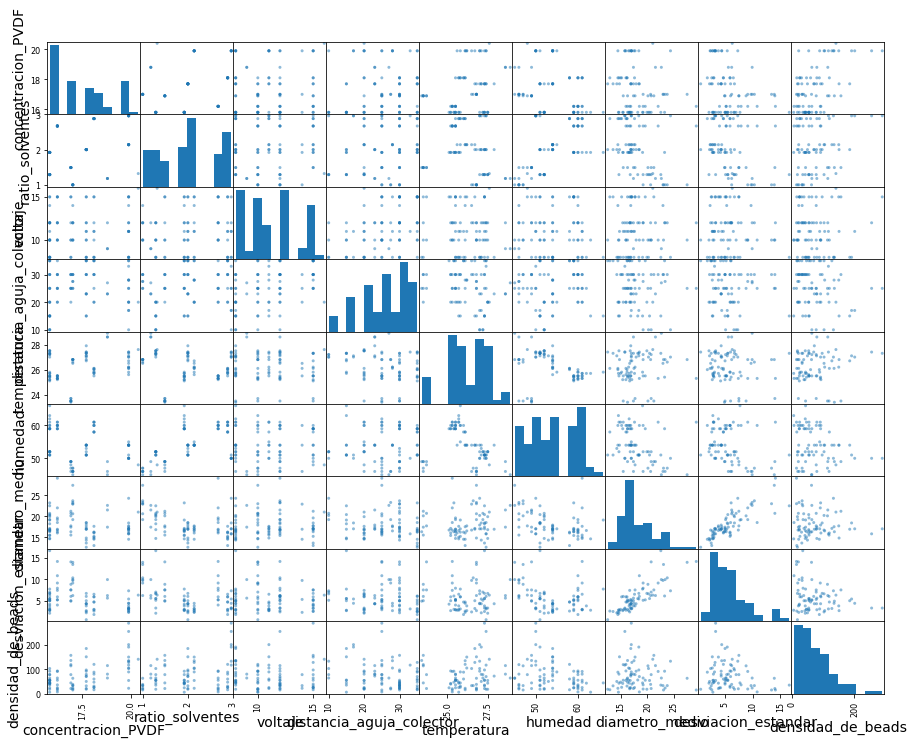

In [ ]:
#beads.hist(bins=10, figsize=(10,10))
attributes = ["concentracion_PVDF","ratio_solventes", "voltaje", "distancia_aguja_colector", 'temperatura', 'humedad',
              "diametro_medio", "desviacion_estandar", "densidad_de_beads"]
scatter_matrix(beads[attributes], figsize=(15, 12))
corr_matrix = beads[attributes].corr()
print(corr_matrix["diametro_medio"].sort_values(ascending=False),'\n', '\n')
print(corr_matrix["desviacion_estandar"].sort_values(ascending=False),'\n', '\n')
print(corr_matrix["densidad_de_beads"].sort_values(ascending=False))



Se puede observar primeramente que hay cierta correlación entre los targets, pero no es muy alta. Al final, esto requeriría un análisis propio para determinar los parámetros ideales teniendo en cuenta ambos factores.

Segundo, vemos que hay una relativamente alta correlación en ambos targets, de forma inversa para la distancia aguja-colector, es decir que cuanto más lejos se coloca el colector, más pequeñas son las beads y hay menos en relación a las fibras.

La concentración de PVDF parece correlacionar bastante con una mayor densidad de beads, pero no es tan relevante a priori en lo que respecta al tamaño de las mismas. El caso inverso es el del ratio entre solventes que correlaciona fuertemente con el diámetro pero no con la densidad. Ninguno de los dos parece correlacionar mucho con el voltaje, y la temperatura y humedad, parecen no ser tan inofensivas como se esperaba, sobre todo la humedad.

Finalmente, se observa una fuerte influencia del caudal, como era esperado, sin embargo extrañamente, para el caso del diámetro, esa correlación es inversa. Vamos a ver un poco más de qué se trata ese feature.

Analizo un poco las variable categóricas o con pocos valores (colector y caudal).

In [ ]:
print(beads["colector"].unique())

['Rotante 4' 'plano']


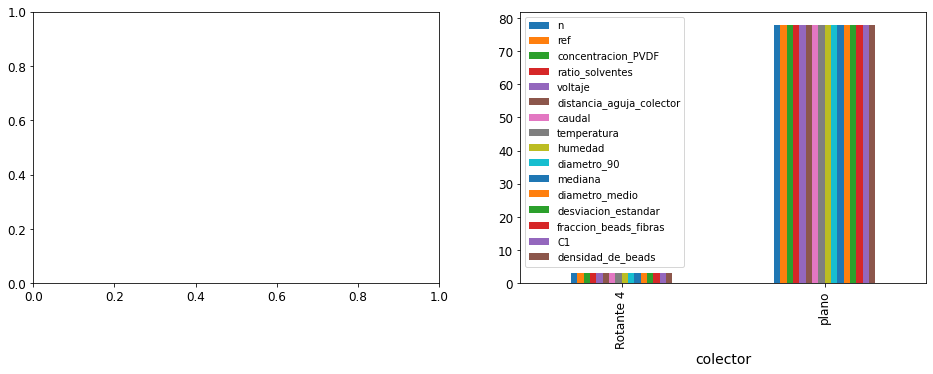

In [ ]:
#caudal_group = beads.groupby('caudal') SAQUÉ TODO LO QUE TIENE QUE VER CON EL CAUDAL
colector_group = beads.groupby('colector')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,5))
#caudal_group.count().plot(kind='bar', ax=ax1)
colector_group.count().plot(kind='bar', ax=ax2)

Vemos que es un set de datos completo (no faltan en ningún feature) y que la mayoría de datos corresponde a un caudal de 0.2 ml/h y al colector plano.

In [ ]:
print('Descripción colector - diámetro medio:')
colector_group.describe()['diametro_medio'].round(2)

Descripción colector - diámetro medio:


,count,mean,std,min,25%,50%,75%,max
colector,,,,,,,,
Rotante 4,3.0,20.50,2.74,17.4,19.45,21.5,22.05,22.6
plano,78.0,17.98,3.11,12.6,16.05,17.0,19.50,29.1


In [ ]:
print('Descripción colector - densidad:')
colector_group.describe()['densidad_de_beads'].round(2)

Descripción colector - densidad:


,count,mean,std,min,25%,50%,75%,max
colector,,,,,,,,
Rotante 4,3.0,86.33,26.08,64.0,72.0,80.0,97.5,115.0
plano,78.0,74.37,56.46,6.0,33.0,55.5,101.5,289.0


Vemos que no hay una influencia clara del colector en los targets, al menos en su valor medio. Claramente hay una mayor desviación estándar para el caso del colector plano, ya que hay muchos más datos.

In [ ]:
#print('Descripción caudal - diámetro medio:')
#caudal_group.describe()['diametro_medio'].round(2)

In [ ]:
#print('Descripción caudal - densidad_de_beads:')
#caudal_group.describe()['densidad_de_beads'].round(2)

En el caso del caudal, como era esperable por todo lo dicho antes, sí se observa una fuerte variación en el valor medio. El caso de la densidad, responde a lo ya observado en estudios preliminares: aumentar el caudal, aumenta notablemente la proporción de beads. Sin embargo, se observa una disminución del diámetro medio. Es posible, así mismo, que este tipo de desviaciones tengan que ver con la poca cantidad de datos en caudales distintos a 0.2 ml/h y por eso, más allá de este estudio preliminar, el caudal no será tenido en cuenta en el resto del análisis (sabiendo que en alguna medida puede sesgar las mediciones con caudal distinto a 0.2 ml/h, una opción sería no tener en cuenta esos 14 datos, pero voy a ver si me da el tiempo). 

## Regresor lineal


Divido la data en train y test y separo los targets para trabajarlos individualmente.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(features_select, targets, test_size=0.2, random_state=4)

t_train_ = t_train.to_numpy()
t_test_ = t_test.to_numpy()
d_train = t_train_[:,0]
d_test = t_test_[:,0]
std_train = t_train_[:,1]
std_test = t_test_[:,1]
f_train = t_train_[:,2]
f_test = t_test_[:,2]

En lo que sigue voy a ajustar los datos de ambos targets mediante modelos lineales con PolynomialFeatures y LinearRegression. Voy a obtener el grado que mejor funciona en cada caso, y expresar las métricas relevantes, así como todos los gráficos para entender lo que está pasando. Esto me interesa hacerlo, porque previo a cursar la materia, metí la data en un programa de diseño de experimentos (Design Expert 11) que realiza ajustes con polinomios y transformaciones a los datos. De esta manera quizás pueda comparar algunos resultados.

El RMSE del diámetro es: 3.25 +- 0.985
El RMSE de la desviación estándar es: 3.26 +- 0.821
El RMSE de la densidad es: 48.4 +- 17.1
El R2 del diámetro es: -0.325
El R2 de la desviación estándar es: -0.544
El R2 de la densidad es: 0.0994


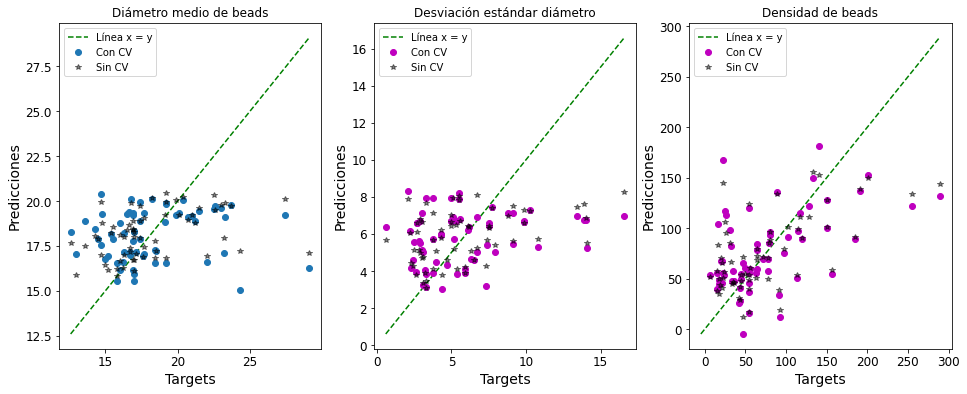

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

grado=1

pp1 = Pipeline([('scaler', MinMaxScaler()),
               ('poly', PolynomialFeatures(degree=grado)),
               ('lr', LinearRegression(fit_intercept=False))
              ])

pp1.fit(x_train, d_train)
dy = cross_val_predict(pp1, x_train, d_train, cv=8)
dy2 = pp1.predict(x_train)
scoresd = cross_val_score(pp1, x_train, d_train, cv=8, scoring='neg_root_mean_squared_error')
erroresd = -scoresd
r2d = cross_val_score(pp1, x_train, d_train, cv=8, scoring='r2')

pp1.fit(x_train, std_train)
stdy = cross_val_predict(pp1, x_train, std_train, cv=8)
stdy2 = pp1.predict(x_train)
scoresstd = cross_val_score(pp1, x_train, std_train, cv=8, scoring='neg_root_mean_squared_error')
erroresstd = -scoresstd
r2std = cross_val_score(pp1, x_train, std_train, cv=8, scoring='r2')

pp1.fit(x_train, f_train)
fy = cross_val_predict(pp1, x_train, f_train, cv=8)
fy2 = pp1.predict(x_train)
scoresf = cross_val_score(pp1, x_train, f_train, cv=8, scoring='neg_root_mean_squared_error')
erroresf = -scoresf
r2f= cross_val_score(pp1, x_train, f_train, cv=8, scoring='r2')

#para plotear:
limsd = [np.min([np.min(d_train), np.min(dy), np.min(dy2)]), np.max([np.max(d_train), np.max(dy), np.max(dy2)])]
limsstd = [np.min([np.min(std_train), np.min(stdy), np.min(stdy2)]), np.max([np.max(std_train), np.max(stdy), np.max(stdy2)])]
limsf = [np.min([np.min(f_train), np.min(fy), np.min(fy2)]), np.max([np.max(f_train), np.max(fy), np.max(fy2)])]

# Create two subplots and unpack the output array immediately
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,6))
ax1.plot(limsd, limsd, 'g--', label = 'Línea x = y')
ax1.plot(d_train, dy,'o', label='Con CV')
ax1.plot(d_train, dy2,'k*',label='Sin CV', alpha=0.5)
ax1.set_title('Diámetro medio de beads')
ax1.set_xlabel('Targets')
ax1.set_ylabel('Predicciones')
ax1.legend()

ax2.plot(limsstd, limsstd, 'g--', label = 'Línea x = y')
ax2.plot(std_train, stdy,'mo', label='Con CV')
ax2.plot(std_train, stdy2,'k*',label='Sin CV', alpha=0.5)
ax2.set_title('Desviación estándar diámetro')
ax2.set_xlabel('Targets')
ax2.set_ylabel('Predicciones')
ax2.legend()

ax3.plot(limsf, limsf, 'g--', label = 'Línea x = y')
ax3.plot(f_train, fy,'mo', label='Con CV')
ax3.plot(f_train, fy2,'k*',label='Sin CV', alpha=0.5)
ax3.set_title('Densidad de beads')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Predicciones')
ax3.legend()


# qué me dice el número del RMSE?
print('El RMSE del diámetro es: {:.3} +- {:.3}'.format((erroresd.mean()), erroresd.std()))
print('El RMSE de la desviación estándar es: {:.3} +- {:.3}'.format((erroresstd.mean()), erroresstd.std()))
print('El RMSE de la densidad es: {:.3} +- {:.3}'.format((erroresf.mean()), erroresf.std()))
print('El R2 del diámetro es: {:.3}'.format(r2d.mean()))
print('El R2 de la desviación estándar es: {:.3}'.format(r2std.mean()))
print('El R2 de la densidad es: {:.3}'.format(r2f.mean()))


Diámetro: RMSE según el grado
1 3.2454125132762988
2 3.210004878770948
3 4.947502949285563
4 59.333694364235605
5 47.115453374923696
6 43.05844610179197
Desviación estándar: RMSE según el grado
1 3.25834038238083
2 2.9450576278820986
3 5.672831526982336
4 31.20493429459446
5 24.983591643452836
6 22.956704444415227
Densidad: RMSE según el grado
1 48.39760312172223
2 61.89247618397959
3 77.76904565457204
4 334.75662496662585
5 282.80373314575934
6 267.765570962018


Text(0, 0.5, 'RMSE')

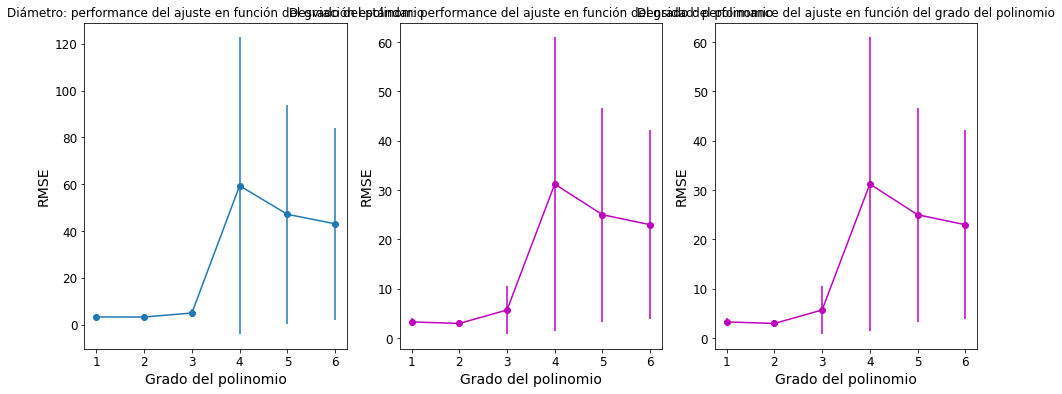

In [ ]:
pp2 = Pipeline([('scaler', MinMaxScaler()),
                ('poly', PolynomialFeatures()),
               ('lr', LinearRegression(fit_intercept=False))])

maxdegree = 6
grados = np.arange(1,maxdegree+1,1)
RMSE = np.zeros((grados.size,3))
std_RMSE = np.zeros((grados.size,3))

parameters={'poly__degree':grados}
grilla=GridSearchCV(pp2,parameters,cv = 8,refit=True, scoring='neg_root_mean_squared_error')

grilla.fit(x_train,d_train)
for i in range(grados.size):
  RMSE[i,0] = -grilla.cv_results_['mean_test_score'][i]
  std_RMSE[i,0] = grilla.cv_results_['std_test_score'][i]

print('Diámetro: RMSE según el grado')
for ni, i in enumerate([1,2,3,4,5,6]):
  print(i,-grilla.cv_results_['mean_test_score'][ni])

grilla.fit(x_train,std_train)
for i in range(grados.size):
  RMSE[i,1] = -grilla.cv_results_['mean_test_score'][i]
  std_RMSE[i,1] = grilla.cv_results_['std_test_score'][i]

print('Desviación estándar: RMSE según el grado')
for ni, i in enumerate([1,2,3,4,5,6]):
  print(i,-grilla.cv_results_['mean_test_score'][ni])

grilla.fit(x_train,f_train)
for i in range(grados.size):
  RMSE[i,2] = -grilla.cv_results_['mean_test_score'][i]
  std_RMSE[i,2] = grilla.cv_results_['std_test_score'][i]

print('Densidad: RMSE según el grado')
for ni, i in enumerate([1,2,3,4,5,6]):
  print(i,-grilla.cv_results_['mean_test_score'][ni])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,6))
ax1.errorbar(grados, RMSE[:,0], std_RMSE[:,0], fmt='-o')
ax1.set_title('Diámetro: performance del ajuste en función del grado del polinomio')
ax1.set_xlabel('Grado del polinomio')
ax1.set_ylabel('RMSE')

ax2.errorbar(grados, RMSE[:,1], std_RMSE[:,1], fmt='-mo')
ax2.set_title('Desviación estándar: performance del ajuste en función del grado del polinomio')
ax2.set_xlabel('Grado del polinomio')
ax2.set_ylabel('RMSE')

ax3.errorbar(grados, RMSE[:,1], std_RMSE[:,1], fmt='-mo')
ax3.set_title('Densidad: performance del ajuste en función del grado del polinomio')
ax3.set_xlabel('Grado del polinomio')
ax3.set_ylabel('RMSE')

##Ridge

Pongo un regularizador

Text(0.5, 1.0, 'Densidad: parámetros que optimizan el modelo')

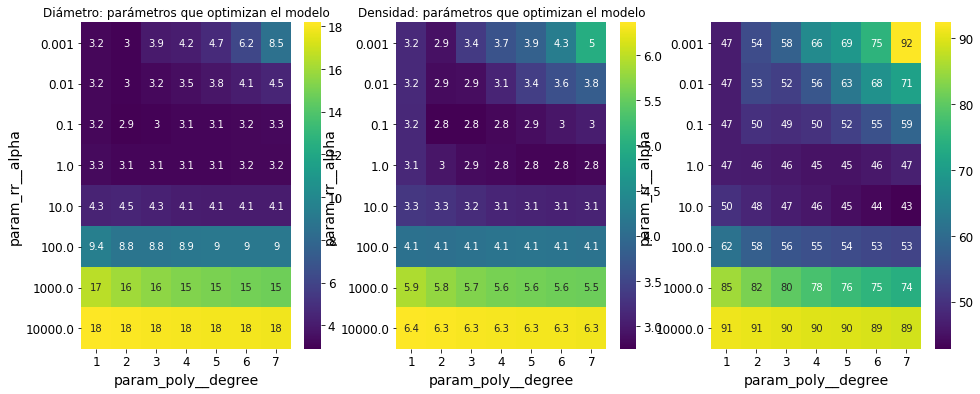

In [ ]:
from sklearn.linear_model import Ridge
import seaborn as sns

maxdegree = 7
grados = np.arange(1,maxdegree+1,1)
# hiperparámetro de regularización
alphas = np.logspace(-3, 4, 8) #con menores alphas, no regulariza y hay sobrefiteo. Igual no mejora el test_score, así que no afecta al resultado.

pp_ridge = Pipeline([('scaler', MinMaxScaler()),
                     ('poly', PolynomialFeatures()),
                     ('rr', Ridge(fit_intercept=False, solver='cholesky') )])

param_grid = {'poly__degree': grados,
             'rr__alpha': alphas}

grilla2 = GridSearchCV(pp_ridge, param_grid, cv=10, scoring='neg_root_mean_squared_error', return_train_score = True)

grilla2.fit(x_train, d_train)
resultsd1 = pd.DataFrame(grilla2.cv_results_)
#resultsd.info()
resultsd1['rmse'] = -resultsd1.mean_test_score
mejoresd1 = grilla2.best_params_
elmejord1 = grilla2.best_estimator_

grilla2.fit(x_train, std_train)
resultsstd1 = pd.DataFrame(grilla2.cv_results_)
#resultsd.info()
resultsstd1['rmse'] = -resultsstd1.mean_test_score
mejoresstd1 = grilla2.best_params_
elmejorstd1 = grilla2.best_estimator_

def f(x,b):
  return np.exp(-x*b)
b = 0.03
ws = f(f_train,b)

grilla2.fit(x_train, f_train,ws)
resultsf1 = pd.DataFrame(grilla2.cv_results_)
#resultsf1.info()
resultsf1['rmse'] = -resultsf1.mean_test_score
mejoresf1 = grilla2.best_params_
elmejorf1 = grilla2.best_estimator_

pivotd = resultsd1.pivot(index='param_rr__alpha', columns='param_poly__degree', values='rmse')
pivotstd = resultsstd1.pivot(index='param_rr__alpha', columns='param_poly__degree', values='rmse')
pivotf = resultsf1.pivot(index='param_rr__alpha', columns='param_poly__degree', values='rmse')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,6))
sns.heatmap(pivotd, cmap='viridis', annot=True, ax=ax1)
ax1.set_title('Diámetro: parámetros que optimizan el modelo')
sns.heatmap(pivotstd, cmap='viridis', annot=True, ax=ax2)
ax2.set_title('Densidad: parámetros que optimizan el modelo')
sns.heatmap(pivotf, cmap='viridis', annot=True, ax=ax3)
ax2.set_title('Densidad: parámetros que optimizan el modelo')


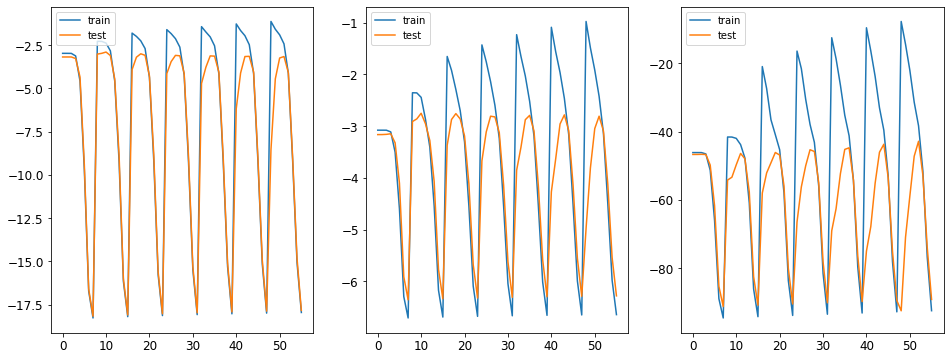

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,6))
ax1.plot(resultsd1['mean_train_score'], label='train')
ax1.plot(resultsd1['mean_test_score'], label='test')
ax1.legend()
ax2.plot(resultsstd1['mean_train_score'], label='train')
ax2.plot(resultsstd1['mean_test_score'], label='test')
ax2.legend()
ax3.plot(resultsf1['mean_train_score'], label='train')
ax3.plot(resultsf1['mean_test_score'], label='test')
ax3.legend()

Los mejores parámetros para el diámetros son: {'poly__degree': 2, 'rr__alpha': 0.1}
El RMSE con el regularizador es: 2.91
Los mejores parámetros para la desviación estándar son: {'poly__degree': 2, 'rr__alpha': 0.1}
El RMSE con el regularizador es: 2.75
Los mejores parámetros para la densidad son: {'poly__degree': 7, 'rr__alpha': 10.0}
El RMSE con el regularizador es: 42.9


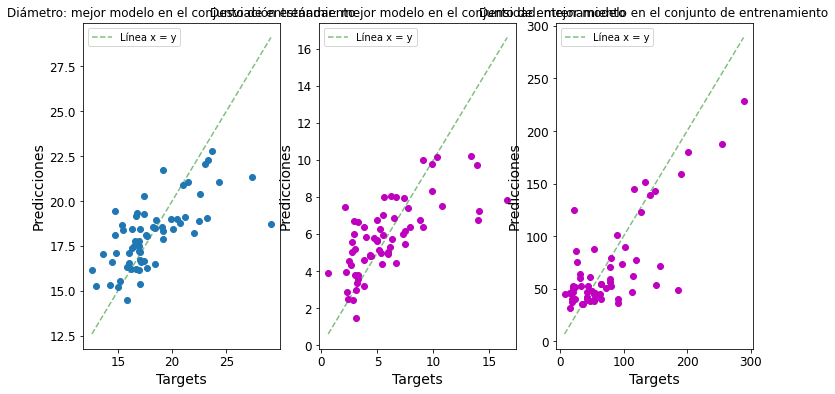

In [ ]:
print('Los mejores parámetros para el diámetros son: {}'.format(mejoresd1))
print('El RMSE con el regularizador es: {:.3}'.format(np.min(resultsd1['rmse'])))

print('Los mejores parámetros para la desviación estándar son: {}'.format(mejoresstd1))
print('El RMSE con el regularizador es: {:.3}'.format(np.min(resultsstd1['rmse'])))

print('Los mejores parámetros para la densidad son: {}'.format(mejoresf1))
print('El RMSE con el regularizador es: {:.3}'.format(np.min(resultsf1['rmse'])))

dy_train2 = elmejord1.predict(x_train)
stdy_train2 = elmejorstd1.predict(x_train)
fy_train2 = elmejorf1.predict(x_train)

#para plotear:
limsd = [np.min([np.min(d_train), np.min(dy_train2)]), np.max([np.max(d_train), np.max(dy_train2)])]
limsstd = [np.min([np.min(std_train), np.min(stdy_train2)]), np.max([np.max(std_train), np.max(stdy_train2)])]
limsf = [np.min([np.min(f_train), np.min(fy_train2)]), np.max([np.max(f_train), np.max(fy_train2)])]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
ax1.plot(limsd, limsd, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax1.plot(d_train, dy_train2,'o')
ax1.set_title('Diámetro: mejor modelo en el conjunto de entrenamiento')
ax1.set_xlabel('Targets')
ax1.set_ylabel('Predicciones')
ax1.legend()

ax2.plot(limsstd, limsstd, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax2.plot(std_train, stdy_train2,'mo')
ax2.set_title('Desviación estándar: mejor modelo en el conjunto de entrenamiento')
ax2.set_xlabel('Targets')
ax2.set_ylabel('Predicciones')
ax2.legend()

ax3.plot(limsf, limsf, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax3.plot(f_train, fy_train2,'mo')
ax3.set_title('Densidad: mejor modelo en el conjunto de entrenamiento')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Predicciones')
ax3.legend()

Ya empiezo a ver que tengo un problema claro con algunos outliers que toman valores de los targets bastante más altos de lo que el modelo predice. El RMSE mejoró con el regularizador para el diámetro pero no para la densidad.

In [ ]:
import itertools

xnp = x_train.to_numpy()
nfeat = len(xnp[0,:]) # cantidad de features que uso
n = [50, 50, 50, 50]#, 3, 5, 5]# resolución que le doy a cada feature
fmin = np.zeros(nfeat)  
fmax = np.zeros(nfeat)

for i in range(nfeat):
  fmin[i], fmax[i] = np.min(xnp[:,i]), np.max(xnp[:,i])

f1 = np.linspace(fmin[0],fmax[0],n[0])
f2 = np.linspace(fmin[1],fmax[1],n[1])
f3 = np.linspace(fmin[2],fmax[2],n[2])
f4 = np.linspace(fmin[3],fmax[3],n[3])
#f5 = np.linspace(fmin[4],fmax[4],n[4])
#f6 = np.linspace(fmin[5],fmax[5],n[5])
#f7 = np.linspace(fmin[6],fmax[6],n[6])

# result contains all possible combinations.
combinations = list(itertools.product(f1,f2,f3,f4))#,f5,f6,f7))
x = np.asarray(combinations)

In [ ]:
modelod1 = elmejord1.predict(x)
modelostd1 = elmejorstd1.predict(x)
#modelof1 = elmejorf1.predict(x)

# índices óptimos (los mínimos):
inopd1 = np.int(np.where(modelod1 == np.min(modelod1))[0])
inopstd1 = np.int(np.where(modelostd1 == np.min(modelostd1))[0])
#inopf1 = np.int(np.where(modelof1 == np.min(modelof1))[0])

units = ['%','','kV','cm']#,'ml/h','°C','%']

print('Diámetro: los mejores parámetros según el modelo son:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(x[inopd1,i]),units[i])

print('Desviación estándar: los mejores parámetros según el modelo son:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(x[inopstd1,i]),units[i])

#print('Densidad: los mejores parámetros según el modelo son:')
#for i in range(4):
#  print(features.columns[i],'= {:.1f}'.format(x[inopf1,i]),units[i])

Diámetro: los mejores parámetros según el modelo son:
concentracion_PVDF = 20.4 %
ratio_solventes = 2.9 
voltaje = 8.0 kV
distancia_aguja_colector = 35.0 cm
Desviación estándar: los mejores parámetros según el modelo son:
concentracion_PVDF = 20.4 %
ratio_solventes = 2.8 
voltaje = 8.0 kV
distancia_aguja_colector = 35.0 cm


*Obs: después de hacer esto estuve viendo como me propusieron el tema de usar el interpolate y el optimize. En este caso no me pareció necesario tampoco, porque los valores*

In [ ]:
# from scipy.interpolate import griddata

# nn = 20

# f1 = np.linspace(fmin[0],fmax[0],nn)
# f2 = np.linspace(fmin[1],fmax[1],nn)
# f3 = np.linspace(fmin[2],fmax[2],nn)
# f4 = np.linspace(fmin[3],fmax[3],nn)
# f5 = np.linspace(fmin[4],fmax[4],nn)
# f6 = np.linspace(fmin[5],fmax[5],nn)
# f7 = np.linspace(fmin[6],fmax[6],nn)

# ff = (f1,f2,f3,f4,f5,f6,f7)

# modelod = elmejord.predict(x)

# grid = griddata(x, modelod, ff, method='nearest')


*Quería ver qué onda con el $R^{2}$ pero daba muy feo.*

##Huber Regressor

In [ ]:
pphuber = Pipeline([('scaler', MinMaxScaler()),
               ('poly', PolynomialFeatures()),
               ('hb', HuberRegressor(epsilon = 1.5, max_iter=1000, fit_intercept=False))
              ])

epsilons = np.arange(1,2,0.2)

param_grid = {'poly__degree': grados, 'epsilon': epsilons, 'alpha': alphas}

grilla22 = GridSearchCV(pphuber, parameters, cv=10, scoring='neg_root_mean_squared_error')

grilla22.fit(x_train, d_train)
resultsd2 = pd.DataFrame(grilla22.cv_results_)
#resultsd.info()
resultsd2['rmse'] = -resultsd2.mean_test_score
mejoresd2 = grilla22.best_params_
elmejord2 = grilla22.best_estimator_

grilla22.fit(x_train, std_train)
resultsstd2 = pd.DataFrame(grilla22.cv_results_)
#resultsd.info()
resultsstd2['rmse'] = -resultsstd2.mean_test_score
mejoresstd2 = grilla22.best_params_
elmejorstd2 = grilla22.best_estimator_

grilla22.fit(x_train, f_train)
resultsf2 = pd.DataFrame(grilla22.cv_results_)
#resultsf2.info()
resultsf2['rmse'] = -resultsf2.mean_test_score
mejoresf2 = grilla22.best_params_
elmejorf2 = grilla22.best_estimator_

print('Los mejores parámetros para el diámetros son: {}'.format(mejoresd2))
print('El RMSE con el Huber Regressor es: {:.3}'.format(np.min(resultsd2['rmse'])))

print('Los mejores parámetros para la desviación estándar son: {}'.format(mejoresstd2))
print('El RMSE con el Huber Regressor es: {:.3}'.format(np.min(resultsstd2['rmse'])))

print('Los mejores parámetros para la densidad son: {}'.format(mejoresf2))
print('El RMSE con el Huber Regressor es: {:.3}'.format(np.min(resultsf2['rmse'])))

dy_train22 = elmejord2.predict(x_train)
stdy_train22 = elmejorstd2.predict(x_train)
fy_train22 = elmejorf2.predict(x_train)

#para plotear:
limsd = [np.min([np.min(d_train), np.min(dy_train22)]), np.max([np.max(d_train), np.max(dy_train22)])]
limsstd = [np.min([np.min(std_train), np.min(stdy_train22)]), np.max([np.max(std_train), np.max(stdy_train22)])]
limsf = [np.min([np.min(f_train), np.min(fy_train22)]), np.max([np.max(f_train), np.max(fy_train22)])]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
ax1.plot(limsd, limsd, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax1.plot(d_train, dy_train22,'o')
ax1.set_title('Diámetro: mejor modelo en el conjunto de entrenamiento')
ax1.set_xlabel('Targets')
ax1.set_ylabel('Predicciones')
ax1.legend()

ax2.plot(limsstd, limsstd, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax2.plot(std_train, stdy_train22,'mo')
ax2.set_title('Desviación estándar: mejor modelo en el conjunto de entrenamiento')
ax2.set_xlabel('Targets')
ax2.set_ylabel('Predicciones')
ax2.legend()

ax3.plot(limsf, limsf, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax3.plot(f_train, fy_train22,'mo')
ax3.set_title('Densidad: mejor modelo en el conjunto de entrenamiento')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Predicciones')
ax3.legend()


# pp1.fit(x_train, d_train)
# dy = cross_val_predict(pp1, x_train, d_train, cv=8)
# dy2 = pp1.predict(x_train)
# scoresd = cross_val_score(pp1, x_train, d_train, cv=8, scoring='neg_root_mean_squared_error')
# erroresd = -scoresd
# r2d = cross_val_score(pp1, x_train, d_train, cv=8, scoring='r2')

# pp1.fit(x_train, std_train)
# stdy = cross_val_predict(pp1, x_train, std_train, cv=8)
# stdy2 = pp1.predict(x_train)
# scoresstd = cross_val_score(pp1, x_train, std_train, cv=8, scoring='neg_root_mean_squared_error')
# erroresstd = -scoresstd
# r2std = cross_val_score(pp1, x_train, std_train, cv=8, scoring='r2')

# pp1.fit(x_train, f_train)
# fy = cross_val_predict(pp1, x_train, f_train, cv=8)
# fy2 = pp1.predict(x_train)
# scoresf = cross_val_score(pp1, x_train, f_train, cv=8, scoring='neg_root_mean_squared_error')
# erroresf = -scoresf
# r2f= cross_val_score(pp1, x_train, f_train, cv=8, scoring='r2')

# #para plotear:
# limsd = [np.min([np.min(d_train), np.min(dy), np.min(dy2)]), np.max([np.max(d_train), np.max(dy), np.max(dy2)])]
# limsstd = [np.min([np.min(std_train), np.min(stdy), np.min(stdy2)]), np.max([np.max(std_train), np.max(stdy), np.max(stdy2)])]
# limsf = [np.min([np.min(f_train), np.min(fy), np.min(fy2)]), np.max([np.max(f_train), np.max(fy), np.max(fy2)])]

# # Create two subplots and unpack the output array immediately
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,6))
# ax1.plot(limsd, limsd, 'g--', label = 'Línea x = y')
# ax1.plot(d_train, dy,'o', label='Con CV')
# ax1.plot(d_train, dy2,'k*',label='Sin CV', alpha=0.5)
# ax1.set_title('Diámetro medio de beads')
# ax1.set_xlabel('Targets')
# ax1.set_ylabel('Predicciones')
# ax1.legend()

# ax2.plot(limsstd, limsstd, 'g--', label = 'Línea x = y')
# ax2.plot(std_train, stdy,'mo', label='Con CV')
# ax2.plot(std_train, stdy2,'k*',label='Sin CV', alpha=0.5)
# ax2.set_title('Desviación estándar diámetro')
# ax2.set_xlabel('Targets')
# ax2.set_ylabel('Predicciones')
# ax2.legend()

# ax3.plot(limsf, limsf, 'g--', label = 'Línea x = y')
# ax3.plot(f_train, fy,'mo', label='Con CV')
# ax3.plot(f_train, fy2,'k*',label='Sin CV', alpha=0.5)
# ax3.set_title('Densidad de beads sobre fibras')
# ax3.set_xlabel('Targets')
# ax3.set_ylabel('Predicciones')
# ax3.legend()

# # qué me dice el número del RMSE?
# print('El RMSE del diámetro es: {:.3} +- {:.3}'.format((erroresd.mean()), erroresd.std()))
# print('El RMSE de la desviación estándar es: {:.3} +- {:.3}'.format((erroresstd.mean()), erroresstd.std()))
# print('El RMSE de la Densidad es: {:.3} +- {:.3}'.format((erroresf.mean()), erroresf.std()))
# print('El R2 del diámetro es: {:.3}'.format(r2d.mean()))
# print('El R2 de la desviación estándar es: {:.3}'.format(r2std.mean()))
# print('El R2 de la densidad es: {:.3}'.format(r2f.mean()))

In [ ]:
modelod2 = elmejord2.predict(x)
modelostd2 = elmejorstd2.predict(x)
modelof2 = elmejorf2.predict(x)

# índices óptimos (los mínimos):
inopd2 = np.int(np.where(modelod2 == np.min(modelod2))[0])
inopstd2 = np.int(np.where(modelostd2 == np.min(modelostd2))[0])
inopf2 = np.int(np.where(modelof2 == np.min(modelof2))[0])

units = ['%','','kV','cm']#,'ml/h','°C','%']

print('Diámetro: los mejores parámetros según el modelo son:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(x[inopd2,i]),units[i])

print('Desviación estándar: los mejores parámetros según el modelo son:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(x[inopstd2,i]),units[i])

print('Densidad: los mejores parámetros según el modelo son:')
for i in range(4):
  print(features.columns[i],'= {:.1f}'.format(x[inopf2,i]),units[i])

##Intento de transformación

Prueba de transformación: (sacado de [aquí](https://machinelearningmastery.com/how-to-transform-target-variables-for-regression-with-scikit-learn/))

In [ ]:
# gaussian_svm = Pipeline([
#         ("scaler", MinMaxScaler()),
#         ("svm_rbf", SVR(kernel='rbf'))
#     ])

# # hiperparámetros
# gammas = np.logspace(-7,4,12)
# Cs = np.linspace(10,310,10)

# param_grid = {'svm_rbf__gamma': gammas,
#              'svm_rbf__C': Cs}

# grilla3 = GridSearchCV(gaussian_svm, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# # define the target transform wrapper
# wrapped_model = TransformedTargetRegressor(regressor=grilla3, transformer=MinMaxScaler())

# # use the target transform wrapper
# wrapped_model.fit(x_train, d_train)
# yhat = wrapped_model.predict(x_train)

# resultsd3 = wrapped_model.score
# #resultsd.info()
# #resultsd3['rmse'] = -resultsd3.mean_test_score
# mejoresd3 = wrapped_model.get_params
# #elmejord3 = wrapped_model.best_estimator_

In [ ]:
# print('Los mejores parámetros para el diámetros son: {}'.format(mejoresd3))
# print('El RMSE con el SVR con rbf es: {:.3}'.format(np.min(resultsd3)))

In [ ]:
# print(resultsd3)
# print(mejoresd3)

In [ ]:
# # example of normalizing input and output variables for regression.
# from numpy import mean
# from numpy import absolute
# from numpy import loadtxt
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import HuberRegressor
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.compose import TransformedTargetRegressor
# # load data
# dataset = loadtxt('housing.csv', delimiter=",")
# # split into inputs and outputs
# X, y = dataset[:, :-1], dataset[:, -1]
# # prepare the model with input scaling
# pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())])
# # prepare the model with target scaling
# model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# # evaluate model
# cv = KFold(n_splits=10, shuffle=True, random_state=1)
# scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # convert scores to positive
# scores = absolute(scores)
# # summarize the result
# s_mean = mean(scores)
# print('Mean MAE: %.3f' % (s_mean))

In [ ]:
# # example of power transform input and output variables for regression.
# from numpy import mean
# from numpy import absolute
# from numpy import loadtxt
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import HuberRegressor
# from sklearn.preprocessing import PowerTransformer
# from sklearn.compose import TransformedTargetRegressor
# # load data
# dataset = loadtxt('housing.csv', delimiter=",")
# # split into inputs and outputs
# X, y = dataset[:, :-1], dataset[:, -1]
# # prepare the model with input scaling
# pipeline = Pipeline(steps=[('power', PowerTransformer()), ('model', HuberRegressor())])
# # prepare the model with target scaling
# model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())
# # evaluate model
# cv = KFold(n_splits=10, shuffle=True, random_state=1)
# scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # convert scores to positive
# scores = absolute(scores)
# # summarize the result
# s_mean = mean(scores)
# print('Mean MAE: %.3f' % (s_mean))

Acá siguen los modelos, lo anterior son los intentos de transformación.

##SVR

In [ ]:
from sklearn.svm import SVR
import time

Text(0.5, 1.0, 'Densidad: parámetros que optimizan el modelo')

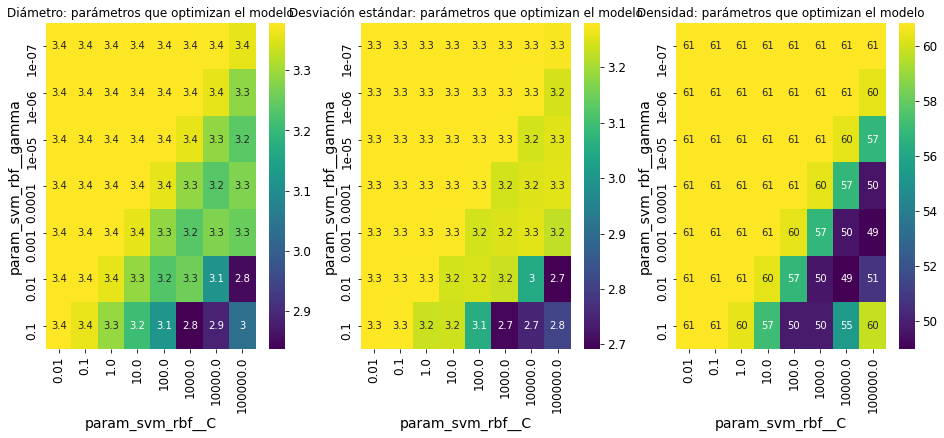

In [ ]:
gaussian_svm = Pipeline([
        ("scaler", MinMaxScaler()),
        ("svm_rbf", SVR(kernel='rbf'))
    ])
#https://scikit-learn.org/stable/modules/svm.html#svm-regression

# hiperparámetros
gammas = np.logspace(-7,-1,7) # si ponía gammas más altos me overfitteaba. Cuanto más grande gamma, más cerca tienen que estar otros puntos para ser afectados.
Cs = np.logspace(-2,5,8)# también el C grande tiende a overfittear porque le da importancia a todos los puntos. No hace una curva suave.

param_grid = {'svm_rbf__gamma': gammas,
             'svm_rbf__C': Cs}

grilla3 = GridSearchCV(gaussian_svm, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score = True)

grilla3.fit(x_train, d_train)
resultsd3 = pd.DataFrame(grilla3.cv_results_)
#resultsd.info()
resultsd3['rmse'] = -resultsd3.mean_test_score
mejoresd3 = grilla3.best_params_
elmejord3=grilla3.best_estimator_

grilla3.fit(x_train, std_train)
resultsstd3 = pd.DataFrame(grilla3.cv_results_)
#resultsd.info()
resultsstd3['rmse'] = -resultsstd3.mean_test_score
mejoresstd3 = grilla3.best_params_
elmejorstd3=grilla3.best_estimator_

#pesos para la densidad, me interesa que prediga mejor en los primeros números
ws = np.linspace(10,1,len(f_train)) 

grilla3.fit(x_train, f_train,ws)
resultsf3 = pd.DataFrame(grilla3.cv_results_)
#resultsf.info()
resultsf3['rmse'] = -resultsf3.mean_test_score
mejoresf3 = grilla3.best_params_
elmejorf3=grilla3.best_estimator_

pivotd = resultsd3.pivot(index='param_svm_rbf__gamma', columns='param_svm_rbf__C', values='rmse')
pivotstd = resultsstd3.pivot(index='param_svm_rbf__gamma', columns='param_svm_rbf__C', values='rmse')
pivotf = resultsf3.pivot(index='param_svm_rbf__gamma', columns='param_svm_rbf__C', values='rmse')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,6))
sns.heatmap(pivotd, cmap='viridis', annot=True, ax=ax1)
ax1.set_title('Diámetro: parámetros que optimizan el modelo')
sns.heatmap(pivotstd, cmap='viridis', annot=True, ax=ax2)
ax2.set_title('Desviación estándar: parámetros que optimizan el modelo')
sns.heatmap(pivotf, cmap='viridis', annot=True, ax=ax3)
ax3.set_title('Densidad: parámetros que optimizan el modelo')

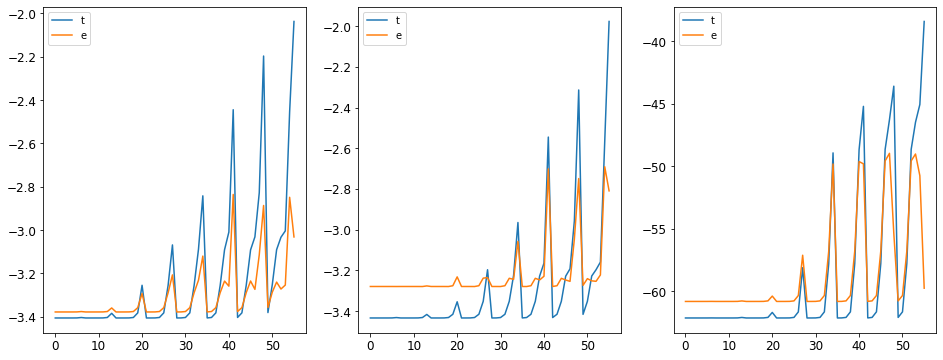

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,6))
ax1.plot(resultsd3['mean_train_score'])
ax1.legend('train')
ax1.plot(resultsd3['mean_test_score'])
ax1.legend('test')
ax2.plot(resultsstd3['mean_train_score'])
ax2.legend('train')
ax2.plot(resultsstd3['mean_test_score'])
ax2.legend('test')
ax3.plot(resultsf3['mean_train_score'])
ax3.legend('train')
ax3.plot(resultsf3['mean_test_score'])
ax3.legend('test')

Los mejores parámetros para el diámetros son: {'svm_rbf__C': 1000.0, 'svm_rbf__gamma': 0.1}
El RMSE con el SVR con rbf es: 2.84
Los mejores parámetros para la desviación estándar son: {'svm_rbf__C': 100000.0, 'svm_rbf__gamma': 0.01}
El RMSE con el SVR con rbf es: 2.69
Los mejores parámetros para la densidad son: {'svm_rbf__C': 10000.0, 'svm_rbf__gamma': 0.01}
El RMSE con el SVR con rbf es: 49.0


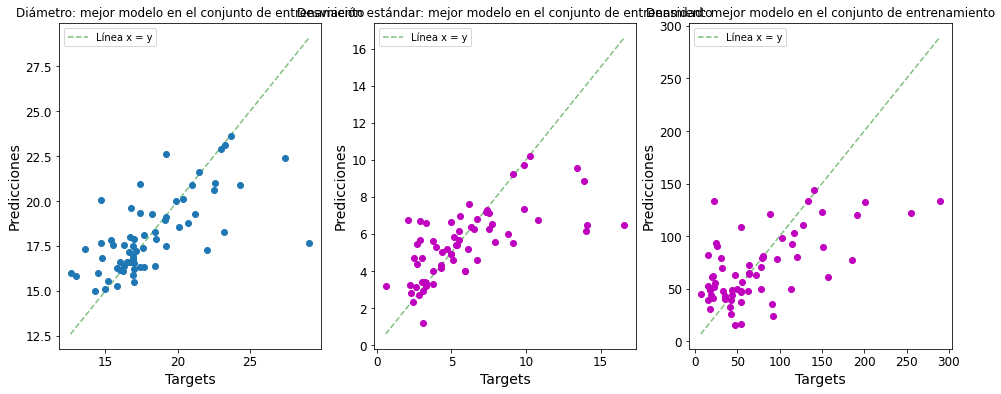

In [ ]:
print('Los mejores parámetros para el diámetros son: {}'.format(mejoresd3))
print('El RMSE con el SVR con rbf es: {:.3}'.format(np.min(resultsd3['rmse'])))

print('Los mejores parámetros para la desviación estándar son: {}'.format(mejoresstd3))
print('El RMSE con el SVR con rbf es: {:.3}'.format(np.min(resultsstd3['rmse'])))

print('Los mejores parámetros para la densidad son: {}'.format(mejoresf3))
print('El RMSE con el SVR con rbf es: {:.3}'.format(np.min(resultsf3['rmse'])))

dy_train3 = elmejord3.predict(x_train)
stdy_train3 = elmejorstd3.predict(x_train)
fy_train3 = elmejorf3.predict(x_train)

#para plotear:
limsd = [np.min([np.min(d_train), np.min(dy_train3)]), np.max([np.max(d_train), np.max(dy_train3)])]
limsstd = [np.min([np.min(std_train), np.min(stdy_train3)]), np.max([np.max(std_train), np.max(stdy_train3)])]
limsf = [np.min([np.min(f_train), np.min(fy_train3)]), np.max([np.max(f_train), np.max(fy_train3)])]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
ax1.plot(limsd, limsd, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax1.plot(d_train, dy_train3,'o')
ax1.set_title('Diámetro: mejor modelo en el conjunto de entrenamiento')
ax1.set_xlabel('Targets')
ax1.set_ylabel('Predicciones')
ax1.legend()

ax2.plot(limsstd, limsstd, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax2.plot(std_train, stdy_train3,'mo')
ax2.set_title('Desviación estándar: mejor modelo en el conjunto de entrenamiento')
ax2.set_xlabel('Targets')
ax2.set_ylabel('Predicciones')
ax2.legend()

ax3.plot(limsf, limsf, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax3.plot(f_train, fy_train3,'mo')
ax3.set_title('Densidad: mejor modelo en el conjunto de entrenamiento')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Predicciones')
ax3.legend()

In [ ]:
modelod3 = elmejord3.predict(x)
modelostd3 = elmejorstd3.predict(x)
modelof3 = elmejorf3.predict(x)

# índices óptimos (los mínimos):
inopd3 = np.int(np.where(modelod3 == np.min(modelod3))[0])
inopstd3 = np.int(np.where(modelostd3 == np.min(modelostd3))[0])
inopf3 = np.int(np.where(modelof3 == np.min(modelof3))[0])

units = ['%','','kV','cm']#,'ml/h','°C','%']

print('Diámetro: los mejores parámetros según el modelo son:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(x[inopd3,i]),units[i])

print('Desviación estándar: los mejores parámetros según el modelo son:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(x[inopstd3,i]),units[i])

print('Densidad: los mejores parámetros según el modelo son:')
for i in range(4):
  print(features.columns[i],'= {:.1f}'.format(x[inopf3,i]),units[i])

Diámetro: los mejores parámetros según el modelo son:
concentracion_PVDF = 19.5 %
ratio_solventes = 2.6 
voltaje = 8.0 kV
distancia_aguja_colector = 35.0 cm
Desviación estándar: los mejores parámetros según el modelo son:
concentracion_PVDF = 20.4 %
ratio_solventes = 2.8 
voltaje = 8.0 kV
distancia_aguja_colector = 35.0 cm
Densidad: los mejores parámetros según el modelo son:
concentracion_PVDF = 15.8 %
ratio_solventes = 1.0 
voltaje = 8.0 kV
distancia_aguja_colector = 35.0 cm


##Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rnd_reg = RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=4)

parametros = {'n_estimators':[100,300,500,700,900],'max_depth':[2,3,4,5,7,10,15]}
grilla4 = GridSearchCV(rnd_reg, parametros, cv=3, scoring='neg_root_mean_squared_error', 
                       return_train_score=True)

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

grilla4.fit(x_train, d_train)
resultsd4 = pd.DataFrame(grilla4.cv_results_)
#resultsd.info()
resultsd4['rmse'] = -resultsd4.mean_test_score
mejoresd4 = grilla4.best_params_
elmejord4=grilla4.best_estimator_
print("Best estimator:", elmejord4)

grilla4.fit(x_train, std_train)
resultsstd4 = pd.DataFrame(grilla4.cv_results_)
#resultsd.info()
resultsstd4['rmse'] = -resultsstd4.mean_test_score
mejoresstd4 = grilla4.best_params_
elmejorstd4=grilla4.best_estimator_
print("Best estimator:", elmejorstd4)

def f(x,b):
  return np.exp(-x*b)
b = 0.03
ws = f(f_train,b)

grilla4.fit(x_train, f_train,ws)
resultsf4 = pd.DataFrame(grilla4.cv_results_)
#resultsf.info()
resultsf4['rmse'] = -resultsf4.mean_test_score
mejoresf4 = grilla4.best_params_
elmejorf4 = grilla4.best_estimator_
print("Best estimator:", elmejorf4)

Best estimator: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=-1, oob_score=True,
                      random_state=4, verbose=0, warm_start=False)
Best estimator: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=True,
                      random_state=4, verbose=0, warm_start

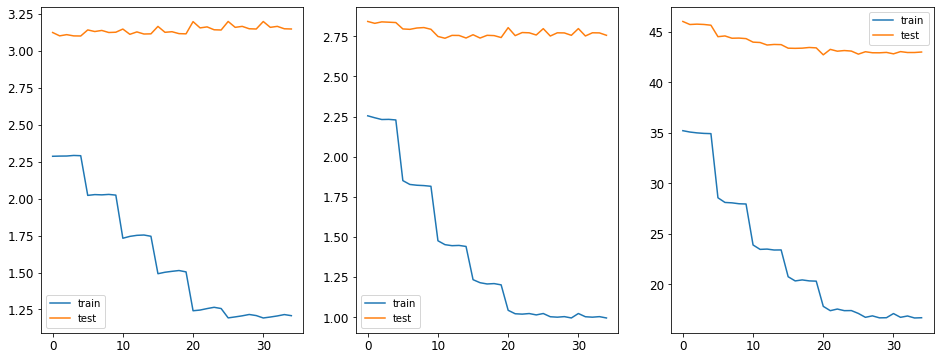

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,6))
ax1.plot(-resultsd4['mean_train_score'], label='train')
ax1.plot(-resultsd4['mean_test_score'], label='test')
ax1.legend()
ax2.plot(-resultsstd4['mean_train_score'], label='train')
ax2.plot(-resultsstd4['mean_test_score'], label='test')
ax2.legend()
ax3.plot(-resultsf4['mean_train_score'], label='train')
ax3.plot(-resultsf4['mean_test_score'], label='test')
ax3.legend()

Los mejores parámetros para el diámetros son: {'max_depth': 2, 'n_estimators': 900}
El RMSE con el random forest es: 3.1
Los mejores parámetros para la desviación estándar son: {'max_depth': 4, 'n_estimators': 300}
El RMSE con el random forest es: 2.74
Los mejores parámetros para la densidad son: {'max_depth': 7, 'n_estimators': 100}
El RMSE con el random forest es: 42.7


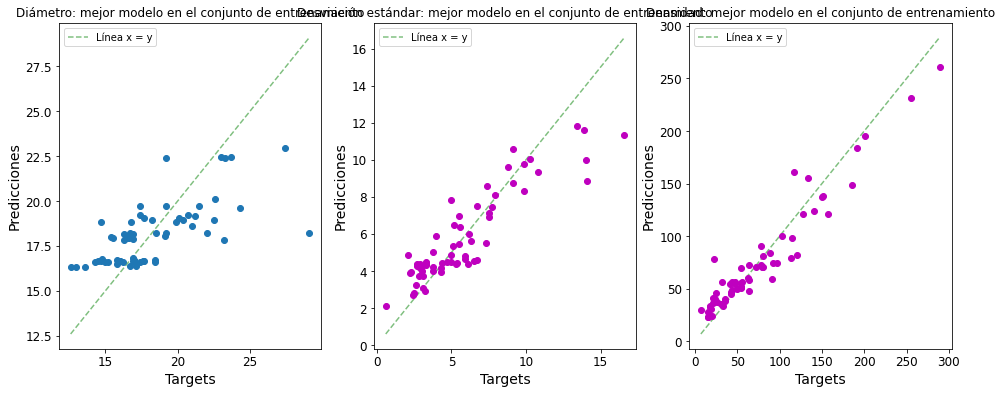

In [ ]:
print('Los mejores parámetros para el diámetros son: {}'.format(mejoresd4))
print('El RMSE con el random forest es: {:.3}'.format(np.min(resultsd4['rmse'])))

print('Los mejores parámetros para la desviación estándar son: {}'.format(mejoresstd4))
print('El RMSE con el random forest es: {:.3}'.format(np.min(resultsstd4['rmse'])))

print('Los mejores parámetros para la densidad son: {}'.format(mejoresf4))
print('El RMSE con el random forest es: {:.3}'.format(np.min(resultsf4['rmse'])))

dy_train4 = elmejord4.predict(x_train)
stdy_train4 = elmejorstd4.predict(x_train)
fy_train4 = elmejorf4.predict(x_train)

#para plotear:
limsd = [np.min([np.min(d_train), np.min(dy_train4)]), np.max([np.max(d_train), np.max(dy_train4)])]
limsstd = [np.min([np.min(std_train), np.min(stdy_train4)]), np.max([np.max(std_train), np.max(stdy_train4)])]
limsf = [np.min([np.min(f_train), np.min(fy_train4)]), np.max([np.max(f_train), np.max(fy_train4)])]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
ax1.plot(limsd, limsd, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax1.plot(d_train, dy_train4,'o')
ax1.set_title('Diámetro: mejor modelo en el conjunto de entrenamiento')
ax1.set_xlabel('Targets')
ax1.set_ylabel('Predicciones')
ax1.legend()

ax2.plot(limsstd, limsstd, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax2.plot(std_train, stdy_train4,'mo')
ax2.set_title('Desviación estándar: mejor modelo en el conjunto de entrenamiento')
ax2.set_xlabel('Targets')
ax2.set_ylabel('Predicciones')
ax2.legend()

ax3.plot(limsf, limsf, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax3.plot(f_train, fy_train4,'mo')
ax3.set_title('Densidad: mejor modelo en el conjunto de entrenamiento')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Predicciones')
ax3.legend()

In [ ]:
modelod4 = elmejord4.predict(x)
modelostd4 = elmejorstd4.predict(x)
modelof4 = elmejorf4.predict(x)

In [ ]:
#acá amplié el algoritmo porque me encontró varios mínimos:

nminsd = np.size(np.where(modelod4 == np.min(modelod4)))
nminsstd = np.size(np.where(modelostd4 == np.min(modelostd4)))
nminsf = np.size(np.where(modelof4 == np.min(modelof4)))
if nminsd >1:
  inopd4 = np.zeros(nminsd)
  for i in range(nminsd):
    inopd4[i] = np.int(np.where(modelod4 == np.min(modelod4))[0][i])
else:
  inopd4 = np.int(np.where(modelod4 == np.min(modelod4))[0])

if nminsstd >1:
  inopstd4 = np.zeros(nminsstd)
  for i in range(nminsstd):
    inopstd4[i] = np.int(np.where(modelostd4 == np.min(modelostd4))[0][i])
else:
  inopd4 = np.int(np.where(modelostd4 == np.min(modelostd4))[0])

if nminsf >1:
  inopf4 = np.zeros(nminsf)
  for i in range(nminsf):
    inopf4[i] = np.int(np.where(modelof4 == np.min(modelof4))[0][i])
else:
  inopf4 = np.int(np.where(modelof4 == np.min(modelof4))[0])

units = ['%','','kV','cm']#,'ml/h','°C','%']

print('Diámetro: los mejores parámetros según el modelo son:')
for i in range(4):
  for j in range(nminsd):
    print('{})'.format(j),features.columns[i], '= {:.1f}'.format(x[np.int(inopd4[j]),i]),units[i])

print('Desviación estándar: los mejores parámetros según el modelo son:')
for i in range(4):
  for j in range(nminsstd):
    print('{})'.format(j),features.columns[i], '= {:.1f}'.format(x[np.int(inopstd4[j]),i]),units[i])

print('Densidad: los mejores parámetros según el modelo son:')
for i in range(4):
  for j in range(nminsf):
    print('{})'.format(j),features.columns[i],'= {:.1f}'.format(x[np.int(inopf4[j]),i]),units[i])

Diámetro: los mejores parámetros según el modelo son:
0) concentracion_PVDF = 17.4 %
1) concentracion_PVDF = 17.4 %
2) concentracion_PVDF = 17.4 %
3) concentracion_PVDF = 17.4 %
4) concentracion_PVDF = 17.4 %
5) concentracion_PVDF = 17.4 %
6) concentracion_PVDF = 17.4 %
7) concentracion_PVDF = 17.4 %
8) concentracion_PVDF = 17.4 %
9) concentracion_PVDF = 17.4 %
10) concentracion_PVDF = 17.4 %
11) concentracion_PVDF = 17.4 %
12) concentracion_PVDF = 17.4 %
13) concentracion_PVDF = 17.4 %
14) concentracion_PVDF = 17.4 %
15) concentracion_PVDF = 17.4 %
16) concentracion_PVDF = 17.4 %
17) concentracion_PVDF = 17.4 %
18) concentracion_PVDF = 17.4 %
19) concentracion_PVDF = 17.4 %
20) concentracion_PVDF = 17.4 %
21) concentracion_PVDF = 17.4 %
22) concentracion_PVDF = 17.4 %
23) concentracion_PVDF = 17.4 %
24) concentracion_PVDF = 17.4 %
25) concentracion_PVDF = 17.4 %
26) concentracion_PVDF = 17.4 %
27) concentracion_PVDF = 17.4 %
28) concentracion_PVDF = 17.4 %
29) concentracion_PVDF = 17.

Ahí se ven todas las configuraciones posibles que según el modelo darían los mínimos de los respectivoss targets. Me parece mejor visualizarlo por target porque se ve que en definitiva algunos quedan fijos, y otros varían muy poco. En definitiva me quedan:

**Para el diámetro:** 
* concentracion_PVDF = 17.4 - 17.9% 
* ratio_solventes = 2.8 - 2.9
* voltaje = 13.6 -14.4 kV
* distancia_aguja_colector = 34.5 - 35 cm


**Para la desviación estándar :** 
* concentracion_PVDF =  17.4 - 17.8% 
* ratio_solventes = 2.0
* voltaje = 8.0 - 8.5 kV
* distancia_aguja_colector = 34.5 - 35 cm


**Para la densidad:**
* concentracion_PVDF =  17.3%
* ratio_solventes = 1.0 - 1.1
* voltaje = 9.6 - 10.4 kV
* distancia_aguja_colector = 31.9 - 32.4 cm


Para fines prácticos, voy a crearme un array con los valores, tomando el valor intermedio en aquellos parámetros que pueden tomar más de un valor.

In [ ]:
paramsrfd = np.array([17.7, 2.8, 14, 35]) 
paramsrfstd = np.array([17.6, 2, 8, 35]) 
paramsrff = np.array([17.3, 1.0, 10, 32])

Quiero ver la relevancia de los features

In [ ]:
rnd_reg_d = RandomForestRegressor(n_jobs=-1, oob_score=True, max_depth = 3 , n_estimators = 900 )
rnd_reg_d.fit(x_train, d_train)
featimpd = rnd_reg_d.feature_importances_
scores = cross_val_score(rnd_reg_d, x_train, d_train, cv=5, scoring="neg_root_mean_squared_error")

rnd_reg_std = RandomForestRegressor(n_jobs=-1, oob_score=True, max_depth = 3 , n_estimators = 700 )
rnd_reg_std.fit(x_train, std_train)
featimpstd = rnd_reg_std.feature_importances_
scores = cross_val_score(rnd_reg_std, x_train, std_train, cv=5, scoring="neg_root_mean_squared_error")

rnd_reg_f = RandomForestRegressor(n_jobs=-1, oob_score=True, max_depth = 5 , n_estimators = 100 )
rnd_reg_f.fit(x_train, f_train)
featimpf = rnd_reg_f.feature_importances_
scores = cross_val_score(rnd_reg_f, x_train, d_train, cv=5, scoring="neg_root_mean_squared_error")

print('La importancia de los features para el diámetro es:')
for name, score in zip(list(features.columns), featimpd):
    print(name, '{:.2}'.format(score))
print('\n')
print('La importancia de los features para la desviación estándar es:')
for name, score in zip(list(features.columns), featimpstd):
    print(name, '{:.2}'.format(score))
print('\n')
print('La importancia de los features para la densidad es:')
for name, score in zip(list(features.columns), featimpf):
    print(name, '{:.2}'.format(score))

La importancia de los features para el diámetro es:
concentracion_PVDF 0.22
ratio_solventes 0.5
voltaje 0.046
distancia_aguja_colector 0.24


La importancia de los features para la desviación estándar es:
concentracion_PVDF 0.31
ratio_solventes 0.41
voltaje 0.13
distancia_aguja_colector 0.15


La importancia de los features para la densidad es:
concentracion_PVDF 0.2
ratio_solventes 0.5
voltaje 0.14
distancia_aguja_colector 0.16


Acá los features que más relevancia tuvieron para el modelo son, para el diámetro: el ratio entre solventes y la distancia aguja colector, lo cual coincide con las correlaciones vistas al principio excepto porque quedaron relegados el caudal y la humedad.

Para la densidad, los más relevantes son la concentración de PVDF, la temperatura y la distancia aguja colector, nuevamente repitiendo la tendencia inicial, excepto por el caudal.

## Red neuronal

Para terminar, y por completitud, entrenemos una red neuronal.

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(4)
np.random.seed(4)
keras.backend.clear_session()

Preparo los datos:

In [ ]:
x_train_nn, x_valid_nn, t_train_nn_, t_valid_nn_ = train_test_split(x_train, t_train, test_size=0.2, random_state=4)

t_train_nn = t_train_nn_.to_numpy()
t_valid_nn = t_valid_nn_.to_numpy()
d_train_nns = t_train_nn[:,0]
std_train_nns = t_train_nn[:,1]
f_train_nns = t_train_nn[:,2]
d_valid_nns = t_valid_nn[:,0]
std_valid_nns = t_valid_nn[:,1]
f_valid_nns = t_valid_nn[:,2]

In [ ]:
scaler = StandardScaler()
x_train_nns = scaler.fit_transform(x_train_nn)
x_valid_nns = scaler.fit_transform(x_valid_nn)

Hago una red neuronal pero dejo hiperparámetros abiertos para pasarla a scikit_learn y hacer un GridSearchCV (dado que lleva tiempo tampoco es que pruebo mil combinaciones).

OBS: le puse como optimizador Adam porque tuve problemas con el SGD (algunas loss me daban "NaN" y rl RMSE negativo). Solo optimizo el learning_rate. 

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden, n_neurons, learning_rate):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=x_train_nns.shape[1:]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1,activation = 'relu')) #pruebo la relu por el tema de que me dé todo positivo
    # lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    #               initial_learning_rate=learning_rate, decay_steps=1000, decay_rate=0.9)
    optimizer = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    model.compile(loss="mse", optimizer=optimizer, metrics=[keras.metrics.RootMeanSquaredError()])
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

# mse_test = keras_reg.score(X_test, y_test)
# y_pred = keras_reg.predict(X_new)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)
tf.random.set_seed(42)

param_distribs = {
    "n_hidden": (2, 3, 4),
    "n_neurons": (100, 200, 300),
    "learning_rate": (1e-3, 1e-2),
}

grid_search_cv5d = GridSearchCV(keras_reg, param_distribs, cv=3, verbose=2, scoring='neg_root_mean_squared_error')
grid_search_cv5d.fit(x_train_nns, d_train_nns, epochs=500,
                  validation_data=(x_valid_nns, d_valid_nns),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] learning_rate=0.001, n_hidden=2, n_neurons=100 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/500
2/2 [==============================] - 1s 519ms/step - loss: 323.8575 - root_mean_squared_error: 17.9960 - val_loss: 343.9681 - val_root_mean_squared_error: 18.5464
Epoch 2/500
2/2 [==============================] - 0s 41ms/step - loss: 320.0951 - root_mean_squared_error: 17.8912 - val_loss: 338.4669 - val_root_mean_squared_error: 18.3975
Epoch 3/500
2/2 [==============================] - 0s 46ms/step - loss: 315.3151 - root_mean_squared_error: 17.7571 - val_loss: 333.1373 - val_root_mean_squared_error: 18.2520
Epoch 4/500
2/2 [==============================] - 0s 43ms/step - loss: 307.6378 - root_mean_squared_error: 17.5395 - val_loss: 327.9110 - val_root_mean_squared_error: 18.1083
Epoch 5/500
2/2 [==============================] - 0s 43ms/step - loss: 305.6194 - root_mean_squared_error: 17.4818 - val_loss: 322.6453 - val_root_mean_squared_error: 17.9623
Epoch 6/500
2/2 [==============================] - 0s 42ms/step - loss: 297.1370 - root_mean_squared_error: 17.2376 - v

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


2/2 [==============================] - 1s 175ms/step - loss: 332.2541 - root_mean_squared_error: 18.2278 - val_loss: 347.8112 - val_root_mean_squared_error: 18.6497
Epoch 2/500
2/2 [==============================] - 0s 44ms/step - loss: 329.7308 - root_mean_squared_error: 18.1585 - val_loss: 343.1046 - val_root_mean_squared_error: 18.5231
Epoch 3/500
2/2 [==============================] - 0s 43ms/step - loss: 325.1938 - root_mean_squared_error: 18.0331 - val_loss: 338.3760 - val_root_mean_squared_error: 18.3950
Epoch 4/500
2/2 [==============================] - 0s 42ms/step - loss: 317.8581 - root_mean_squared_error: 17.8285 - val_loss: 333.6406 - val_root_mean_squared_error: 18.2658
Epoch 5/500
2/2 [==============================] - 0s 51ms/step - loss: 316.1638 - root_mean_squared_error: 17.7808 - val_loss: 328.8943 - val_root_mean_squared_error: 18.1354
Epoch 6/500
2/2 [==============================] - 0s 48ms/step - loss: 307.5429 - root_mean_squared_error: 17.5368 - val_loss: 324

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  3.3min finished


2/2 [==============================] - 1s 267ms/step - loss: 328.9439 - root_mean_squared_error: 18.1363 - val_loss: 343.9029 - val_root_mean_squared_error: 18.5446
Epoch 2/500
2/2 [==============================] - 0s 66ms/step - loss: 322.5250 - root_mean_squared_error: 17.9585 - val_loss: 337.2785 - val_root_mean_squared_error: 18.3651
Epoch 3/500
2/2 [==============================] - 0s 65ms/step - loss: 321.6117 - root_mean_squared_error: 17.9332 - val_loss: 330.4510 - val_root_mean_squared_error: 18.1783
Epoch 4/500
2/2 [==============================] - 0s 73ms/step - loss: 309.1232 - root_mean_squared_error: 17.5816 - val_loss: 323.4487 - val_root_mean_squared_error: 17.9847
Epoch 5/500
2/2 [==============================] - 0s 65ms/step - loss: 300.1682 - root_mean_squared_error: 17.3246 - val_loss: 316.2531 - val_root_mean_squared_error: 17.7835
Epoch 6/500
2/2 [==============================] - 0s 59ms/step - loss: 303.7071 - root_mean_squared_error: 17.4249 - val_loss: 308

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fd1e8011790>,
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': (0.001, 0.01), 'n_hidden': (2, 3, 4),
                         'n_neurons': (100, 200, 300)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
grid_search_cv5std = GridSearchCV(keras_reg, param_distribs, cv=3, verbose=2, scoring='neg_root_mean_squared_error')
grid_search_cv5std.fit(x_train_nns, std_train_nns, epochs=500,
                  validation_data=(x_valid_nns, std_valid_nns),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] learning_rate=0.001, n_hidden=2, n_neurons=100 ..................
Epoch 1/500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2/2 [==============================] - 1s 191ms/step - loss: 41.9201 - root_mean_squared_error: 6.4704 - val_loss: 53.6846 - val_root_mean_squared_error: 7.3270
Epoch 2/500
2/2 [==============================] - 0s 49ms/step - loss: 42.9685 - root_mean_squared_error: 6.5549 - val_loss: 52.3385 - val_root_mean_squared_error: 7.2345
Epoch 3/500
2/2 [==============================] - 0s 45ms/step - loss: 41.5670 - root_mean_squared_error: 6.4471 - val_loss: 51.0187 - val_root_mean_squared_error: 7.1427
Epoch 4/500
2/2 [==============================] - 0s 43ms/step - loss: 39.0037 - root_mean_squared_error: 6.2448 - val_loss: 49.7183 - val_root_mean_squared_error: 7.0511
Epoch 5/500
2/2 [==============================] - 0s 43ms/step - loss: 38.9083 - root_mean_squared_error: 6.2373 - val_loss: 48.4793 - val_root_mean_squared_error: 6.9627
Epoch 6/500
2/2 [==============================] - 0s 43ms/step - loss: 36.7579 - root_mean_squared_error: 6.0628 - val_loss: 47.2676 - val_root_mean_s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


2/2 [==============================] - 1s 177ms/step - loss: 42.8913 - root_mean_squared_error: 6.5450 - val_loss: 55.4108 - val_root_mean_squared_error: 7.4438
Epoch 2/500
2/2 [==============================] - 0s 49ms/step - loss: 45.2180 - root_mean_squared_error: 6.7244 - val_loss: 55.4108 - val_root_mean_squared_error: 7.4438
Epoch 3/500
2/2 [==============================] - 0s 45ms/step - loss: 45.4800 - root_mean_squared_error: 6.7437 - val_loss: 55.4108 - val_root_mean_squared_error: 7.4438
Epoch 4/500
2/2 [==============================] - 0s 50ms/step - loss: 44.2850 - root_mean_squared_error: 6.6542 - val_loss: 55.4108 - val_root_mean_squared_error: 7.4438
Epoch 5/500
2/2 [==============================] - 0s 48ms/step - loss: 45.7580 - root_mean_squared_error: 6.7640 - val_loss: 55.4108 - val_root_mean_squared_error: 7.4438
Epoch 6/500
2/2 [==============================] - 0s 45ms/step - loss: 44.7830 - root_mean_squared_error: 6.6920 - val_loss: 55.4108 - val_root_mean_s

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  2.6min finished


2/2 [==============================] - 1s 195ms/step - loss: 36.4915 - root_mean_squared_error: 6.0379 - val_loss: 34.6734 - val_root_mean_squared_error: 5.8884
Epoch 2/500
2/2 [==============================] - 0s 52ms/step - loss: 14.9375 - root_mean_squared_error: 3.8643 - val_loss: 19.8162 - val_root_mean_squared_error: 4.4515
Epoch 3/500
2/2 [==============================] - 0s 54ms/step - loss: 8.9253 - root_mean_squared_error: 2.9875 - val_loss: 22.4501 - val_root_mean_squared_error: 4.7382
Epoch 4/500
2/2 [==============================] - 0s 62ms/step - loss: 6.8137 - root_mean_squared_error: 2.5912 - val_loss: 25.5362 - val_root_mean_squared_error: 5.0533
Epoch 5/500
2/2 [==============================] - 0s 52ms/step - loss: 6.1121 - root_mean_squared_error: 2.4694 - val_loss: 29.2145 - val_root_mean_squared_error: 5.4050
Epoch 6/500
2/2 [==============================] - 0s 63ms/step - loss: 6.8613 - root_mean_squared_error: 2.6176 - val_loss: 22.7385 - val_root_mean_squar

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fd1e8011790>,
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': (0.001, 0.01), 'n_hidden': (2, 3, 4),
                         'n_neurons': (100, 200, 300)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
grid_search_cv5f = GridSearchCV(keras_reg, param_distribs, cv=3, verbose=2, scoring='neg_root_mean_squared_error')
grid_search_cv5f.fit(x_train_nns, f_train_nns, epochs=500,
                  validation_data=(x_valid_nns, f_valid_nns),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] learning_rate=0.001, n_hidden=2, n_neurons=100 ..................
Epoch 1/500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2/2 [==============================] - 1s 200ms/step - loss: 7723.8114 - root_mean_squared_error: 87.8828 - val_loss: 6949.1997 - val_root_mean_squared_error: 83.3619
Epoch 2/500
2/2 [==============================] - 0s 45ms/step - loss: 7691.3213 - root_mean_squared_error: 87.6987 - val_loss: 6935.0083 - val_root_mean_squared_error: 83.2767
Epoch 3/500
2/2 [==============================] - 0s 48ms/step - loss: 7704.6974 - root_mean_squared_error: 87.7731 - val_loss: 6915.4243 - val_root_mean_squared_error: 83.1590
Epoch 4/500
2/2 [==============================] - 0s 47ms/step - loss: 7608.7809 - root_mean_squared_error: 87.2282 - val_loss: 6894.8574 - val_root_mean_squared_error: 83.0353
Epoch 5/500
2/2 [==============================] - 0s 44ms/step - loss: 7657.1758 - root_mean_squared_error: 87.5023 - val_loss: 6874.0176 - val_root_mean_squared_error: 82.9097
Epoch 6/500
2/2 [==============================] - 0s 44ms/step - loss: 7639.0885 - root_mean_squared_error: 87.3986 - va

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


2/2 [==============================] - 1s 174ms/step - loss: 11331.4528 - root_mean_squared_error: 106.4443 - val_loss: 6940.5576 - val_root_mean_squared_error: 83.3100
Epoch 2/500
2/2 [==============================] - 0s 46ms/step - loss: 11303.0879 - root_mean_squared_error: 106.3113 - val_loss: 6922.4409 - val_root_mean_squared_error: 83.2012
Epoch 3/500
2/2 [==============================] - 0s 44ms/step - loss: 11266.2454 - root_mean_squared_error: 106.1387 - val_loss: 6904.7310 - val_root_mean_squared_error: 83.0947
Epoch 4/500
2/2 [==============================] - 0s 47ms/step - loss: 11201.6097 - root_mean_squared_error: 105.8358 - val_loss: 6886.9590 - val_root_mean_squared_error: 82.9877
Epoch 5/500
2/2 [==============================] - 0s 46ms/step - loss: 11249.7337 - root_mean_squared_error: 106.0592 - val_loss: 6869.0205 - val_root_mean_squared_error: 82.8796
Epoch 6/500
2/2 [==============================] - 0s 46ms/step - loss: 11249.3893 - root_mean_squared_error: 1

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  3.4min finished


2/2 [==============================] - 1s 249ms/step - loss: 8975.5374 - root_mean_squared_error: 94.6180 - val_loss: 6922.4878 - val_root_mean_squared_error: 83.2015
Epoch 2/500
2/2 [==============================] - 0s 65ms/step - loss: 10284.6270 - root_mean_squared_error: 101.2882 - val_loss: 6858.7979 - val_root_mean_squared_error: 82.8179
Epoch 3/500
2/2 [==============================] - 0s 66ms/step - loss: 9086.4870 - root_mean_squared_error: 95.2787 - val_loss: 6791.9053 - val_root_mean_squared_error: 82.4130
Epoch 4/500
2/2 [==============================] - 0s 69ms/step - loss: 9491.3249 - root_mean_squared_error: 97.4213 - val_loss: 6718.3809 - val_root_mean_squared_error: 81.9657
Epoch 5/500
2/2 [==============================] - 0s 72ms/step - loss: 8552.7935 - root_mean_squared_error: 92.2901 - val_loss: 6638.0244 - val_root_mean_squared_error: 81.4741
Epoch 6/500
2/2 [==============================] - 0s 80ms/step - loss: 10024.9284 - root_mean_squared_error: 99.9727 -

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fd1e8011790>,
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': (0.001, 0.01), 'n_hidden': (2, 3, 4),
                         'n_neurons': (100, 200, 300)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
resultsd5 = pd.DataFrame(grid_search_cv5d.cv_results_)
resultsd5['rmse'] = -resultsd5.mean_test_score
mejoresd5 = grid_search_cv5d.best_params_
elmejord5 = grid_search_cv5d.best_estimator_

resultsstd5 = pd.DataFrame(grid_search_cv5std.cv_results_)
resultsstd5['rmse'] = -resultsstd5.mean_test_score
mejoresstd5 = grid_search_cv5std.best_params_
elmejorstd5 = grid_search_cv5std.best_estimator_

resultsf5 = pd.DataFrame(grid_search_cv5f.cv_results_)
resultsf5['rmse'] = -resultsf5.mean_test_score
mejoresf5 = grid_search_cv5f.best_params_
elmejorf5 = grid_search_cv5f.best_estimator_

Los mejores parámetros para el diámetros son: {'learning_rate': 0.001, 'n_hidden': 2, 'n_neurons': 100}
El RMSE con la red neuronal es: 3.72
Los mejores parámetros para la desviación estándar son: {'learning_rate': 0.01, 'n_hidden': 4, 'n_neurons': 200}
El RMSE con la red neuronal es: 2.76
Los mejores parámetros para la fracción son: {'learning_rate': 0.001, 'n_hidden': 2, 'n_neurons': 300}
El RMSE con la red neuronal es: 50.1


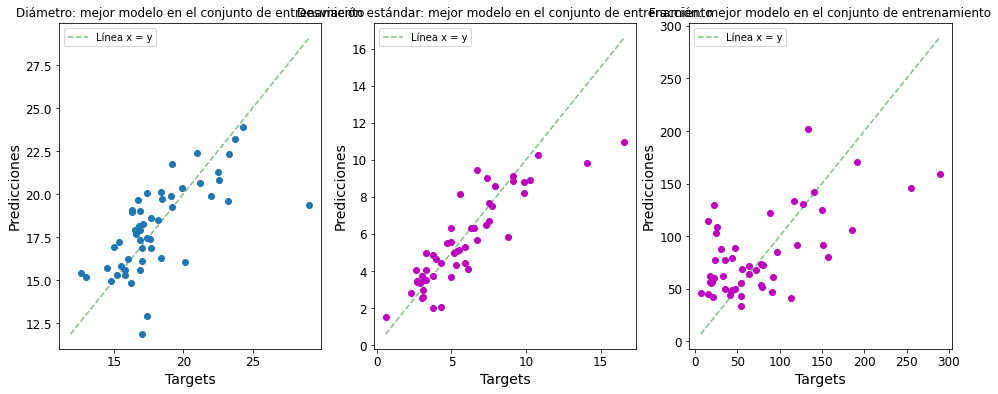

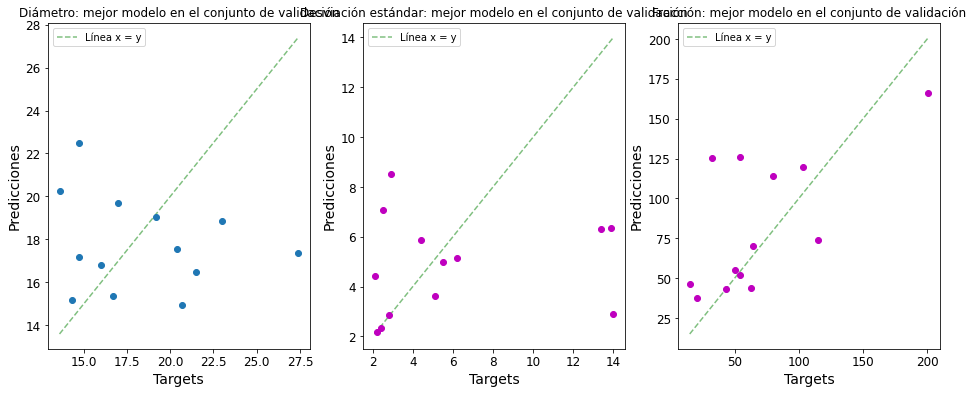

In [ ]:
print('Los mejores parámetros para el diámetros son: {}'.format(mejoresd5))
print('El RMSE con la red neuronal es: {:.3}'.format(np.min(resultsd5['rmse'])))

print('Los mejores parámetros para la desviación estándar son: {}'.format(mejoresstd5))
print('El RMSE con la red neuronal es: {:.3}'.format(np.min(resultsstd5['rmse'])))

print('Los mejores parámetros para la densidad son: {}'.format(mejoresf5))
print('El RMSE con la red neuronal es: {:.3}'.format(np.min(resultsf5['rmse'])))

dy_train_nns = elmejord5.predict(x_train_nns)
stdy_train_nns = elmejorstd5.predict(x_train_nns)
fy_train_nns = elmejorf5.predict(x_train_nns)
dy_pred_nns = elmejord5.predict(x_valid_nns)
stdy_pred_nns = elmejorstd5.predict(x_valid_nns)
fy_pred_nns = elmejorf5.predict(x_valid_nns)

limsd = [np.min([np.min(d_train_nns), np.min(dy_train_nns)]), np.max([np.max(d_train_nns), np.max(dy_train_nns)])]
limsstd = [np.min([np.min(std_train_nns), np.min(stdy_train_nns)]), np.max([np.max(std_train_nns), np.max(stdy_train_nns)])]
limsf = [np.min([np.min(f_train_nns), np.min(fy_train_nns)]), np.max([np.max(f_train_nns), np.max(fy_train_nns)])]

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
ax1.plot(limsd, limsd, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax1.plot(d_train_nns, dy_train_nns,'o')
ax1.set_title('Diámetro: mejor modelo en el conjunto de entrenamiento')
ax1.set_xlabel('Targets')
ax1.set_ylabel('Predicciones')
ax1.legend()

ax2.plot(limsstd, limsstd, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax2.plot(std_train_nns, stdy_train_nns,'mo')
ax2.set_title('Desviación estándar: mejor modelo en el conjunto de entrenamiento')
ax2.set_xlabel('Targets')
ax2.set_ylabel('Predicciones')
ax2.legend()

ax3.plot(limsf, limsf, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax3.plot(f_train_nns, fy_train_nns,'mo')
ax3.set_title('Densidad: mejor modelo en el conjunto de entrenamiento')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Predicciones')
ax3.legend()

limsd2 = [np.min([np.min(d_valid_nns), np.min(dy_pred_nns)]), np.max([np.max(d_valid_nns), np.max(dy_pred_nns)])]
limsstd2 = [np.min([np.min(std_valid_nns), np.min(stdy_pred_nns)]), np.max([np.max(std_valid_nns), np.max(stdy_pred_nns)])]
limsf2 = [np.min([np.min(f_valid_nns), np.min(fy_pred_nns)]), np.max([np.max(f_valid_nns), np.max(fy_pred_nns)])]

fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
ax1.plot(limsd2, limsd2, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax1.plot(d_valid_nns, dy_pred_nns,'o')
ax1.set_title('Diámetro: mejor modelo en el conjunto de validación')
ax1.set_xlabel('Targets')
ax1.set_ylabel('Predicciones')
ax1.legend()

ax2.plot(limsstd2, limsstd2, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax2.plot(std_valid_nns, stdy_pred_nns,'mo')
ax2.set_title('Desviación estándar: mejor modelo en el conjunto de validación')
ax2.set_xlabel('Targets')
ax2.set_ylabel('Predicciones')
ax2.legend()

ax3.plot(limsf2, limsf2, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax3.plot(f_valid_nns, fy_pred_nns,'mo')
ax3.set_title('Densidad: mejor modelo en el conjunto de validación')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Predicciones')
ax3.legend()


Quiero que el modelo me prediga dónde están los mejores parámetros.

In [ ]:
modelod5 = elmejord5.predict(x)
modelostd5 = elmejorstd5.predict(x)
modelof5 = elmejorf5.predict(x)

In [ ]:
#acá amplié el algoritmo porque me encontró varios mínimos:

# índices óptimos (los mínimos):
inopd5 = np.int(np.where(modelod5 == np.min(modelod5))[0])
inopstd5 = np.int(np.where(modelostd5 == np.min(modelostd5))[0])
inopf5 = np.int(np.where(modelof5 == np.min(modelof5))[0])

units = ['%','','kV','cm']#,'ml/h','°C','%']

print('Diámetro: los mejores parámetros según el modelo son:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(x[inopd5,i]),units[i])

print('Desviación estándar: los mejores parámetros según el modelo son:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(x[inopstd5,i]),units[i])

print('Densidad: los mejores parámetros según el modelo son:')
for i in range(4):
  print(features.columns[i],'= {:.1f}'.format(x[inopf5,i]),units[i])


Diámetro: los mejores parámetros según el modelo son:
concentracion_PVDF = 15.8 %
ratio_solventes = 3.0 
voltaje = 8.0 kV
distancia_aguja_colector = 10.0 cm
Desviación estándar: los mejores parámetros según el modelo son:
concentracion_PVDF = 15.8 %
ratio_solventes = 3.0 
voltaje = 8.0 kV
distancia_aguja_colector = 16.6 cm
Fracción: los mejores parámetros según el modelo son:
concentracion_PVDF = 15.8 %
ratio_solventes = 1.0 
voltaje = 8.0 kV
distancia_aguja_colector = 10.0 cm


##Resumen de resultados

In [ ]:
print('RMSE de los modelos optimizados:')
print('')
print('PARA EL DIÁMETRO')
print('Polinomio con regularizador: {:.3}'.format(np.min(resultsd1['rmse'])))
print('SVR: {:.3}'.format(np.min(resultsd3['rmse'])))
print('Random forest: {:.3}'.format(np.min(resultsd4['rmse'])))
#print('Red neuronal: {:.3}'.format(np.min(resultsd5['rmse'])))
print('')
print('PARA LA DESIVACIÓN ESTÁNDAR')
print('Polinomio con regularizador: {:.3}'.format(np.min(resultsstd1['rmse'])))
print('SVR: {:.3}'.format(np.min(resultsstd3['rmse'])))
print('Random forest: {:.3}'.format(np.min(resultsstd4['rmse'])))
#print('Red neuronal: {:.3}'.format(np.min(resultsstd5['rmse'])))
print('')
print('PARA LA DENSIDAD')
print('Polinomio con regularizador: {:.3}'.format(np.min(resultsf1['rmse'])))
print('SVR: {:.3}'.format(np.min(resultsf3['rmse'])))
print('Random forest: {:.3}'.format(np.min(resultsf4['rmse'])))
#print('Red neuronal: {:.3}'.format(np.min(resultsf5['rmse'])))

RMSE de los modelos optimizados:

PARA EL DIÁMETRO
Polinomio con regularizador: 2.91
SVR: 2.82
Random forest: 2.96

PARA LA DESIVACIÓN ESTÁNDAR
Polinomio con regularizador: 2.75
SVR: 2.52
Random forest: 2.4

PARA LA DENSIDAD
Polinomio con regularizador: 43.7
SVR: 46.0
Random forest: 39.0


In [ ]:
print('Mejores parámetros para el diámetro, según cada modelo optimizado:')
print('')
print('Diámetro: Polinomio con regularizador:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(x[inopd1,i]),units[i])
print('')
print('Diámetro: SVR:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(x[inopd3,i]),units[i])
print('')
print('Diámetro: Random Forest:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(paramsrfd[i]),units[i])
print('')
# print('Diámetro: Red neuronal:')
# for i in range(4):
#   print(features.columns[i], '= {:.1f}'.format(x[inopd5,i]),units[i])
# print('')

print('Mejores parámetros para la desviación estándar, según cada modelo optimizado:')
print('')
print('Desviación estándar: Polinomio con regularizador:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(x[inopstd1,i]),units[i])
print('')
print('Desviación estándar: SVR:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(x[inopstd3,i]),units[i])
print('')
print('Desviación estándar: Random Forest:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(paramsrfstd[i]),units[i])
print('')
# print('Desviación estándar: Red neuronal:')
# for i in range(4):
#   print(features.columns[i], '= {:.1f}'.format(x[inopstd5,i]),units[i])
# print('')

print('Mejores parámetros para la densidad, según cada modelo optimizado:')
print('')
print('Polinomio con regularizador:')
for i in range(4):
  print(features.columns[i],'= {:.1f}'.format(x[inopf1,i]),units[i])
print('')
print('SVR:')
for i in range(4):
  print(features.columns[i],'= {:.1f}'.format(x[inopf3,i]),units[i])
print('')
print('Random Forest:')
for i in range(4):
  print(features.columns[i],'= {:.1f}'.format(paramsrff[i]),units[i])
print('')
# print('Red neuronal:')
# for i in range(4):
#   print(features.columns[i],'= {:.1f}'.format(x[inopf5,i]),units[i])

Mejores parámetros para el diámetro, según cada modelo optimizado:

Diámetro: Polinomio con regularizador:
concentracion_PVDF = 20.4 %
ratio_solventes = 2.9 
voltaje = 8.0 kV
distancia_aguja_colector = 35.0 cm

Diámetro: SVR:
concentracion_PVDF = 18.8 %
ratio_solventes = 2.6 
voltaje = 8.0 kV
distancia_aguja_colector = 34.5 cm

Diámetro: Random Forest:
concentracion_PVDF = 17.7 %
ratio_solventes = 2.8 
voltaje = 14.0 kV
distancia_aguja_colector = 35.0 cm

Mejores parámetros para la desviación estándar, según cada modelo optimizado:

Desviación estándar: Polinomio con regularizador:
concentracion_PVDF = 20.4 %
ratio_solventes = 2.8 
voltaje = 8.0 kV
distancia_aguja_colector = 35.0 cm

Desviación estándar: SVR:
concentracion_PVDF = 19.1 %
ratio_solventes = 2.4 
voltaje = 8.0 kV
distancia_aguja_colector = 35.0 cm

Desviación estándar: Random Forest:
concentracion_PVDF = 17.6 %
ratio_solventes = 2.0 
voltaje = 8.0 kV
distancia_aguja_colector = 35.0 cm

Mejores parámetros para la densidad, 

Los mejores modelos son, en cada caso:
* Para el **diámetro: SVR** ("elmejord3")
* Para la **desviación estándar: Random Forest** ("elmejorstd4")
* Para la **densidad: Random Forest** ("elmejorf4")

Los valores de features entonces óptimos según estos modelos, son:

In [ ]:
print('Diámetro: SVR:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(x[inopd3,i]),units[i])
print('')
print('Desviación estándar: Polinomio con regularizador:')
for i in range(4):
  print(features.columns[i], '= {:.1f}'.format(paramsrfstd[i]),units[i])
print('')
print('Densidad: Random Forest')
for i in range(4):
  print(features.columns[i],'= {:.1f}'.format(paramsrff[i]),units[i])
print('')


Diámetro: SVR:
concentracion_PVDF = 18.8 %
ratio_solventes = 2.6 
voltaje = 8.0 kV
distancia_aguja_colector = 34.5 cm

Desviación estándar: Polinomio con regularizador:
concentracion_PVDF = 17.6 %
ratio_solventes = 2.0 
voltaje = 8.0 kV
distancia_aguja_colector = 35.0 cm

Densidad: Random Forest
concentracion_PVDF = 17.3 %
ratio_solventes = 1.0 
voltaje = 10.0 kV
distancia_aguja_colector = 32.0 cm



Rango de parámetros:


*   Concentración PVDF: 17.3 - 18.8 % = **18.2**
*   Ratio entre solventes: 1 - **2.6**
*   Voltaje: **8 - 10 kV** (probar todo el rango)
*   Distancia aguja-colector: **34 cm**

##Búsqueda de mínimos área

In [ ]:
minopd1 = np.min(elmejord3.predict(x))
minopd2 = elmejord3.predict(x[inopd3].reshape(1,-1))
print(minopd1, minopd2)

minopstd1 = np.min(elmejorstd4.predict(x))
minopstd2 = elmejorstd4.predict(paramsrfstd.reshape(1,-1))
print(minopstd1, minopstd2)

paramsrffg = np.array([18,2.8,15,35])

minopf1 = np.min(elmejorf4.predict(x))
minopf2 = elmejorf4.predict(paramsrffg.reshape(1,-1))
print(minopf1, minopf2)

14.328538774126507 [14.32853877]
1.7878997474747462 [1.78789975]
20.379444444444445 [25.96222222]


In [ ]:
import itertools
xnp = x_train.to_numpy()
nfeat = len(xnp[0,:]) # cantidad de features que uso, en este caso serán 4
n = [100, 100, 100, 100]# resolución que le doy a cada feature
fmin = np.zeros(nfeat)
fmax = np.zeros(nfeat)

for i in range(nfeat):
  fmin[i], fmax[i] = np.min(xnp[:,i]), np.max(xnp[:,i])

f1 = np.linspace(fmin[0],fmax[0],n[0]) #concentración
f2 = np.linspace(fmin[1],fmax[1],n[1]) #ratio entre solventes
f3 = np.linspace(fmin[2],fmax[2],n[2]) #voltaje
f4 = np.linspace(fmin[3],fmax[3],n[3]) #distancia aguja colector
#f5 = np.linspace(fmin[4],fmax[4],n[]) #caudal
#f6 = np.linspace(fmin[5],fmax[5],n[]) #temperatura
#f7 = np.linspace(fmin[6],fmax[6],n[]) #humedad

# result contains all possible combinations.
combinations = list(itertools.product(f1,f2))
xx = np.asarray(combinations)

#ratio_solventes = 2.8 
#voltaje = 6.0 kV

#para el área voy a fijar:
f3 = 8*np.ones(len(xx))
f4 = 35.0*np.ones(len(xx))
xxx = np.array([xx[:,0], xx[:,1], f3, f4]).T 

modelod = elmejord3.predict(xxx)
modelodf = np.reshape(modelod, (len(f1),-1)).T
modelostd = elmejorstd4.predict(xxx)
modelostdf = np.reshape(modelostd, (len(f1),-1)).T

f3 = 15*np.ones(len(xx))
f4 = 35.0*np.ones(len(xx))
xxx = np.array([xx[:,0], xx[:,1], f3, f4]).T 

modelof = elmejorf4.predict(xxx)
modeloff = np.reshape(modelof, (len(f1),-1)).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


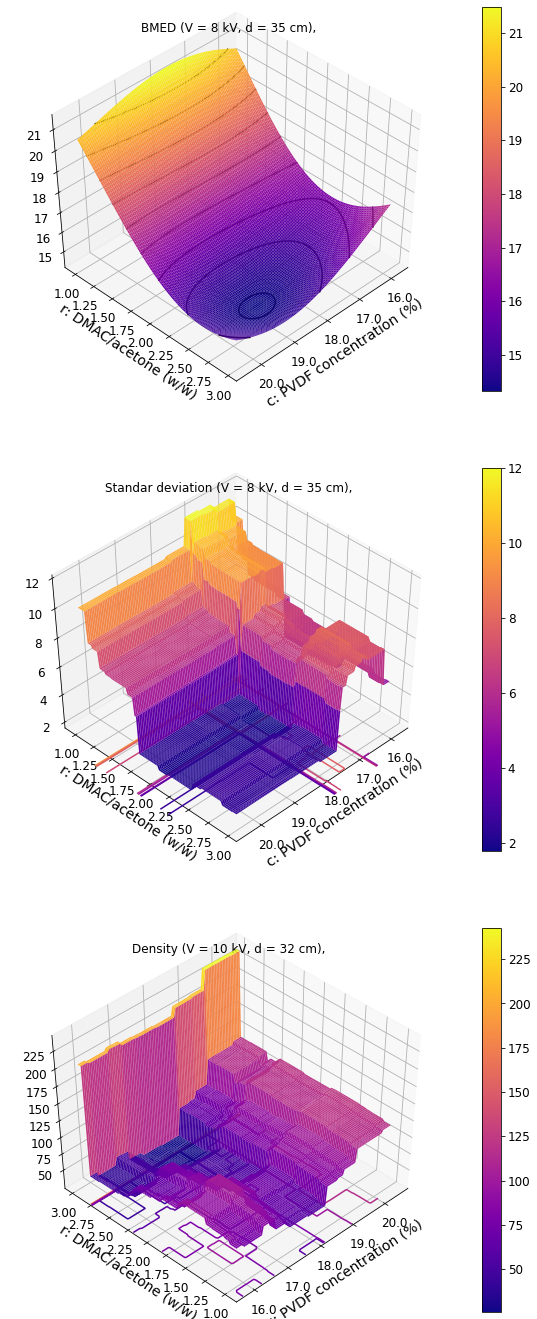

In [ ]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

#elegir cmap: https://matplotlib.org/stable/tutorials/colors/colormaps.html

xval = np.arange(0, len(f1), 11) 
yval = np.arange(0, len(f2), 11)
xti = np.linspace(fmin[0], fmax[0], 10) 
yti = np.linspace(fmin[1], fmax[1], 10)


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(10,24))#plt.figaspect(0.33))

ax1 = fig.add_subplot(3, 1, 1, projection='3d')
X, Y = np.meshgrid(f1,f2)
Z = modelodf
cm1 = ax1.plot_surface(X, Y, Z, cmap="plasma", linewidth=0.5, rstride=1, cstride=1)
ax1.contour(X, Y, Z, 10, cmap="plasma", linewidth=3, linestyles="solid", offset=-1)
ax1.contour(X, Y, Z, 10, colors="k", linestyles="solid")
ax1.set_title('BMED (V = 8 kV, d = 35 cm), ')
ax1.set_xlabel('c: PVDF concentration (%)')
ax1.set_ylabel('r: DMAC/acetone (w/w)')
ax1.xaxis.set_ticklabels(xti)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.yaxis.set_ticklabels(yti)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.view_init(45, 45) #el primero dejarlo en 45 para ver en perspectiva. El segundo según lo que quiera mostrar
fig.colorbar(cm1, ax=ax1)


#surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)
#fig.colorbar(surf, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(3, 1, 2, projection='3d')
Z = modelostdf
cm2 = ax2.plot_surface(X, Y, Z, cmap="plasma", linewidth=0.5, rstride=1, cstride=1)
ax2.contour(X, Y, Z, 10, cmap="plasma", linestyles="solid", offset=-1)
#ax2.contour(X, Y, Z, 10, linewidth=3, colors="k", linestyles="solid")
ax2.set_title('Standar deviation (V = 8 kV, d = 35 cm), ')
ax2.set_xlabel('c: PVDF concentration (%)')
ax2.set_ylabel('r: DMAC/acetone (w/w)')
ax2.xaxis.set_ticklabels(xti)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.yaxis.set_ticklabels(yti)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.view_init(45, 45)
fig.colorbar(cm2, ax=ax2)

ax3 = fig.add_subplot(3, 1, 3, projection='3d')
Z = modeloff
cm3 = ax3.plot_surface(X, Y, Z, cmap="plasma", linewidth=0.5, rstride=1, cstride=1)
ax3.contour(X, Y, Z, 10, cmap="plasma", linestyles="solid", offset=-1)
#ax3.contour(X, Y, Z, 10, linewidth=3, colors="k", linestyles="solid")
ax3.set_title('Density (V = 10 kV, d = 32 cm), ')
ax3.set_xlabel('c: PVDF concentration (%)')
ax3.set_ylabel('r: DMAC/acetone (w/w)')
#ax3.xaxis.set_ticklabels(xti)
ax3.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax3.yaxis.set_ticklabels(yti)
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax3.view_init(45, -135)
fig.colorbar(cm3, ax=ax3)



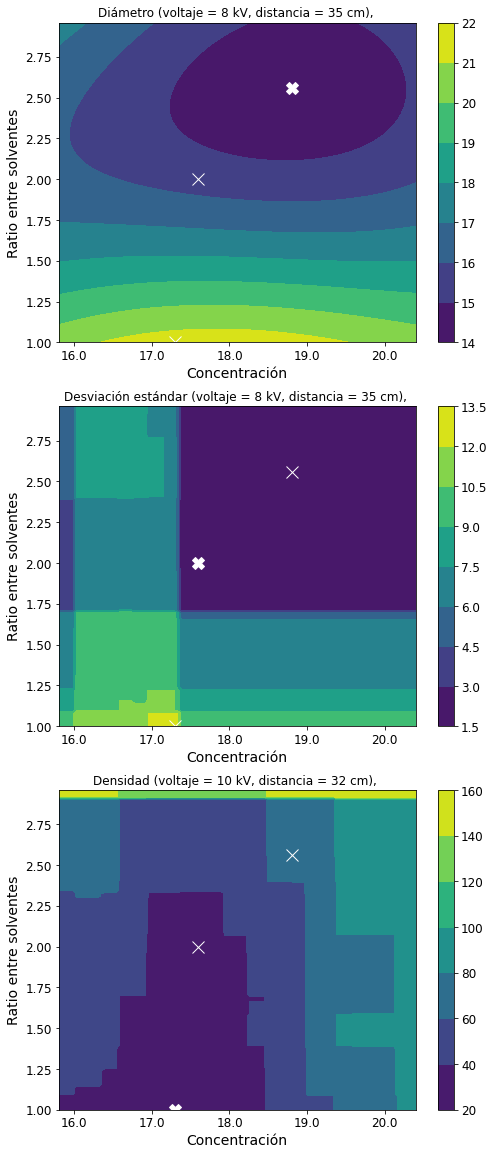

In [ ]:
from matplotlib.ticker import FormatStrFormatter

xval = np.arange(0, len(f1), 11) 
yval = np.arange(0, len(f2), 11)
xti = np.linspace(fmin[0], fmax[0], 10) 
yti = np.linspace(fmin[1], fmax[1], 10)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,20))

cm1 = ax1.contourf(f1,f2,modelodf)
ax1.set_title('Diámetro (voltaje = 8 kV, distancia = 35 cm), ')
ax1.set_xlabel('Concentración')
ax1.set_ylabel('Ratio entre solventes')
ax1.xaxis.set_ticklabels(xti)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.yaxis.set_ticklabels(yti)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.plot(x[inopd3,0],x[inopd3,1],'wX',markersize=12)
ax1.plot(paramsrfstd[0],paramsrfstd[1],'wx',markersize=12)
ax1.plot(paramsrff[0],paramsrff[1],'wx',markersize=12)
fig.colorbar(cm1, ax=ax1)

cm2 = ax2.contourf(f1,f2,modelostdf)
ax2.set_title('Desviación estándar (voltaje = 8 kV, distancia = 35 cm), ')
ax2.set_xlabel('Concentración')
ax2.set_ylabel('Ratio entre solventes')
ax2.xaxis.set_ticklabels(xti)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.yaxis.set_ticklabels(yti)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.plot(x[inopd3,0],x[inopd3,1],'wx',markersize=12)
ax2.plot(paramsrfstd[0],paramsrfstd[1],'wX',markersize=12)
ax2.plot(paramsrff[0],paramsrff[1],'wx',markersize=12)
fig.colorbar(cm2, ax=ax2)

cm3 = ax3.contourf(f1,f2,modeloff) 
ax3.set_title('Densidad (voltaje = 10 kV, distancia = 32 cm), ')
ax3.set_xlabel('Concentración')
ax3.set_ylabel('Ratio entre solventes')
#ax3.xaxis.set_ticklabels(xti)
ax3.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax3.yaxis.set_ticklabels(yti)
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax3.plot(x[inopd3,0],x[inopd3,1],'wx',markersize=12)
ax3.plot(paramsrfstd[0],paramsrfstd[1],'wx',markersize=12)
ax3.plot(paramsrff[0],paramsrff[1],'wX',markersize=12)
fig.colorbar(cm3, ax=ax3)

##Evaluación en el conjunto de testeo

Uso los modelos que mencioné recién (los que dieron mejor).

RMSE test diámetro: 1.739
RMSE test desviación estándar: 2.802
RMSE test densidad: 43.775


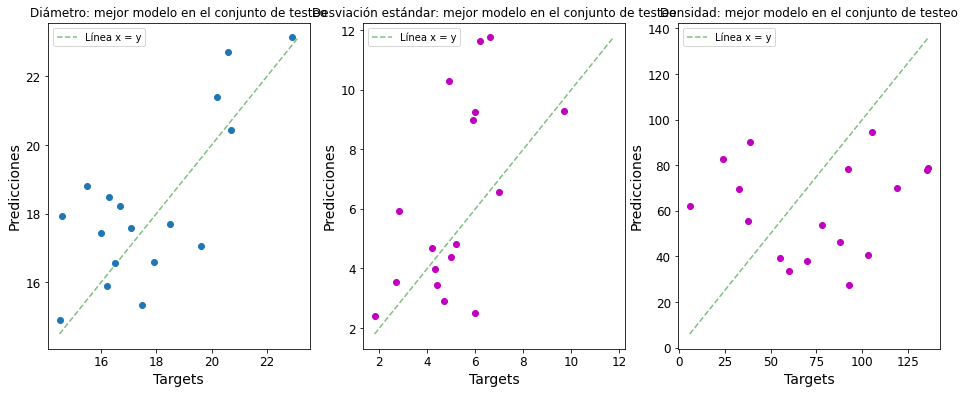

In [ ]:
modtestd = elmejord3.predict(x_test)
modteststd = elmejorstd4.predict(x_test)
modtestf = elmejorf4.predict(x_test)
print("RMSE test diámetro: {:.3f}".format(np.sqrt(mse(modtestd,d_test))))
print("RMSE test desviación estándar: {:.3f}".format(np.sqrt(mse(modteststd,std_test))))
print("RMSE test densidad: {:.3f}".format(np.sqrt(mse(modtestf,f_test))))

#para plotear:
limsd = [np.min([np.min(d_test), np.min(modtestd)]), np.max([np.max(d_test), np.max(modtestd)])]
limsstd = [np.min([np.min(std_test), np.min(modteststd)]), np.max([np.max(std_test), np.max(modteststd)])]
limsf = [np.min([np.min(f_test), np.min(modtestf)]), np.max([np.max(f_test), np.max(modtestf)])]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
ax1.plot(limsd, limsd, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax1.plot(d_test, modtestd,'o')
ax1.set_title('Diámetro: mejor modelo en el conjunto de testeo')
ax1.set_xlabel('Targets')
ax1.set_ylabel('Predicciones')
ax1.legend()

ax2.plot(limsstd, limsstd, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax2.plot(std_test, modteststd,'mo')
ax2.set_title('Desviación estándar: mejor modelo en el conjunto de testeo')
ax2.set_xlabel('Targets')
ax2.set_ylabel('Predicciones')
ax2.legend()

ax3.plot(limsf, limsf, 'g--', label = 'Línea x = y', alpha = 0.5, zorder=0)
ax3.plot(f_test, modtestf,'mo')
ax3.set_title('Densidad: mejor modelo en el conjunto de testeo')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Predicciones')
ax3.legend()

Los RMSE en el conjunto de testeo dieron razonable (parecidos, incluso por debajo de lo que dieron en el entrenamiento, pero son relativamente pocos datos).

Por último, miro cómo queda el error relativo medio con este resultado:

In [ ]:
errreld = np.sqrt(mse(modtestd,d_test))/np.mean(d_test)
errrelstd = np.sqrt(mse(modteststd,std_test))/np.mean(std_test)
errrelf = np.sqrt(mse(modtestf,f_test))/np.mean(f_test)
print('Error relativo medio para el diámetro = {:.1f}%'.format(100*errreld))
print('Error relativo medio para la desviación estándar = {:.1f}%'.format(100*errrelstd))
print('Error relativo medio para la densidad = {:.1f}%'.format(100*errrelf))

Error relativo medio para el diámetro = 9.8%
Error relativo medio para la desviación estándar = 54.5%
Error relativo medio para la densidad = 58.4%


##Conclusiones

Hay muchas cosas para concluir, me quedo con algunas generales:

*   La dispersión de los datos y la existencia de algunos outliers, así como una relativamente baja cantidad de datos, hacen este dataset algo difícil de modelar muy eficientemente (al menos de forma expeditiva).
*   Los distintos modelos logran ajustarse obteniendo RMSE parecidos, sin embargo, difieren bastante en lo que cada uno considera configuración de features óptimos.
*   Es posible seguir optimizando los modelos. En particular, la red neuronal me quedó medio deficiente.
*   Quedan algunas tendencias claras que vale la pena rescatar: 
 - A mayor distancia aguja colector, menor concentración de PVDF y menor caudal, diminuye la densidad de beads.
 - La temperatura y humedad son parámetros que evidentemente tienen algún tipo de influencia sobre la formación de defectos (se entiende pues afectan las propiedades físicas de la solución y el aire, y la dinámica de la evaporación de los solventes). Sin embargo se observa una dispersión importante en los valores obtenidos como óptimos según los modelos. Un análisis más especializado, controlando experimentalmente dichos parámeteros, sería necesario para comprobar la influencia de los mismos en la formación de _beads_. 
*   El error relativo medio en el caso del diámetro es notablemente inferior al de la densidad; podríamos decir entonces que el algoritmo logra ajustarse mejor a los datos del diámetro (y por tanto tendría mayor poder predictivo) que el respectivo para el caso de la densidad.
*   Dada la variación en los parámetros óptimos para ambos targets, otro tipo de análisis o consideración sería necesaria para elegir los parámetros óptimos en general.

##Posibles análisis a futuro



*   Seguir optimizando los algoritmos. En particular se pueden considerar otras métricas (como la Huber loss para penalizar a los outliers) y se puede hacer un barrido mucho más riguroso de hiperparámetros, incluyendo algunos que no fueron optimizados en el RandomForest y la NN. 
*   Considerar solo los datos del dataset con caudal 0.2 ml/h. Si bien se pierden datos, se descarta un feature.
*   Sacar de la optimización la temperatura y humedad ya que por ahora son parámetros difícilmente controlables experimentalmente.
*   Estudiar cómo varía el error relativo en las predicciones (no sólo la media, sino observando los residuos de cada dato).
*   Hacer un barrido pseudo-continuo en el espacio de parámetros interpolando entre los puntos y hallar los mínimos de dicha interpolación para encontrar los parámetros óptimos.
*   Observar las predicciones de los targets en la configuración de features que optimiza al otro target para determinar zonas del espacio de features convenientes en general.
*   Hacer superficies en 3D observando cómo se comportan los targets al variar dos features y fijar el resto. En particular, resulta de interés fijar los features en los valores óptimos más recurrentes para los modelos, y observar cómo varían para los otros.

